
## Table of Content

### 1. Introduction
#### 1.1 Problem Statement
#### 1.2 Business Goal
#### 1.3 Objective of the Assignment
 
### 2. Fetching Data
#### 2.1 Import packages
#### 2.2 Import data

### 3. Data understanding
#### 3.1 Initial Data Understanding
#### 3.2 Understanding Data set using Dictionary
#### 3.3 Features Description

### 4. EDA
#### 4.1  Univariate Analysis
#### 4.1.1 Univariate Analysis for Numerical variables 
##### disttplot,box plot, value_counts
#### 4.1.2 Descriptive quantile Statistical Analysis
#### 4.2 Bivariate Analysis
#### 4.2.1 Bivariate Analysis for Numerical variables
##### scatter plot,pairplot, heatmap
#### 4.4 Univariate and Bivariate Analysis for Ccategorical Variables
##### bar plot,count plot, value_counts
#### 4.5 Conclusion

### 5. Data Cleaning
#### 5.1 Data Imputation
#### 5.2 Map the numerical values of categorical variables to the associated labels
#### 5.3 Create new derived variables
#### 5.4 Outlier Treatment
#### 5.5 Drop some of the features which will not help for our analysis

### 6. Data Preparation
#### 6.1. Create Dummy variables for all the categorical variables
#### 6.2. Divide the data into training and testing data
#### 6.3. Perform Scaling 
#### 6.4. Divide data into dependent and indipendent variables

### 7. Model Building and Evaluation
#### 7.1 Model 1: Included all the independent variables  
##### Evaluate the model by R2-Score ,RSS ,MSE metrics
#### 7.2 Building Models using 'RFE' method 
#### 7.2.1 Model 2: (Build the Linear Regression model by considering top 30 features)
##### Evaluate the model by R2-Score ,RSS ,MSE metrics
##### Evaluate the model by visualizing the patterns of Error term,Error term normality check and visualizing actual and predicted target variable. 
#### 7.2.2 Model 3: (Build the Ridge Regression model by considering top 30 features)
##### Evaluate the model by R2-Score ,RSS ,MSE metrics
##### Evaluate the model Residual Analysis. 
#### 7.2.3 Model 4 : (Build the Lasso Regression model by considering top 10 features)
##### Evaluate the model by R2-Score ,RSS ,MSE metrics
##### Evaluate the model Residual Analysis. 
#### 7.3 Model 5: Build the Ridge Regression model by considering all the features
##### Evaluate the model by R2-Score ,RSS ,MSE metrics
##### Evaluate the model Residual Analysis. 
#### 7.4 Model 6: Build the Lasso Regression model by considering all the features
##### Evaluate the model by R2-Score ,RSS ,MSE metrics
##### Evaluate the model Residual Analysis.  

### 8. Conclusion 

# Advanced Regression Assignment

# 1. Introduction

# 1.1 Problem Statement

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. 
 
The company is looking at prospective properties to buy to enter the market. 

The company wants to know:

   1. Which variables are significant in predicting the price of a house, and
   2. How well those variables describe the price of a house.
   

# 1.2 Business Goal 

Build a model to predict the price of houses with the available independent variables.This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.


# 1.3 Objective of the Project: 

   1. Build a regression model using regularisation in order to predict the actual value of the prospective properties and             decide whether to invest in them or not.
   2. Also, determine the optimal value of lambda for ridge and lasso regression.


# The steps need to follow:

1. Data Understanding and Exploring
2. Data Cleaning
3. Data Preparation
4. Modeling and Evaluation (Linear , Ridge and Lasso Regression)


# 2. Fetching Data

## 2.1  Import packages

In [869]:
# Import all the required Libraries

import numpy as np   # For any mathematical computation
import pandas as pd  # for handling the data
import seaborn as sns  # for plotting the graphs
import matplotlib.pyplot as plt  # For plotting the basic graphs
from sklearn.model_selection import train_test_split # For creating train and test dataset
from sklearn.linear_model import LinearRegression # Import sklearn linear_model LinearRegression
from sklearn.linear_model import Ridge # Import Ridge Regression
from sklearn.linear_model import Lasso # Import Lasso Regression
from sklearn.model_selection import GridSearchCV #Import GridSearchCV for model selection(To tune the optimal value of lambda)
from sklearn.metrics import r2_score,mean_squared_error # Import metrics for model evaluation
# Import MinMaxScaler for scaling the features (Normalization)
from sklearn.preprocessing import MinMaxScaler
# To Split the dataset to train and test set
from sklearn.model_selection import train_test_split
#Import RFE
from sklearn.feature_selection import RFE


# hide warnings
import warnings
warnings.filterwarnings('ignore')

## 2.2 Import data

In [870]:
#Read the dataset given

data = pd.read_csv("train.csv")
data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

# 3. Data Understanding

## 3.1 Initial Data Understanding

In [871]:
data.shape

(1460, 81)

In [872]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Observation: 

1. From the above information,we can observe that dataset has some null value entries
2. Alley,PoolQC,Fence,MiscFeature columns has more null values.(But according to data dictionary many variables null value means not having that category,so we will check in detail)

In [873]:
# Observe the values of each column
for i in data.columns:
    print(i)
    print(data[i].value_counts())
    print("\n")

Id
1460    1
479     1
481     1
482     1
483     1
484     1
485     1
486     1
487     1
488     1
489     1
490     1
491     1
492     1
493     1
494     1
495     1
496     1
497     1
498     1
499     1
480     1
478     1
501     1
477     1
458     1
459     1
460     1
461     1
462     1
463     1
464     1
465     1
466     1
467     1
468     1
469     1
470     1
471     1
472     1
473     1
474     1
475     1
476     1
500     1
502     1
547     1
525     1
527     1
528     1
529     1
530     1
531     1
532     1
533     1
534     1
535     1
536     1
537     1
538     1
539     1
540     1
541     1
542     1
543     1
544     1
545     1
526     1
524     1
503     1
523     1
504     1
505     1
506     1
507     1
508     1
509     1
510     1
511     1
512     1
513     1
514     1
515     1
516     1
517     1
518     1
519     1
520     1
521     1
522     1
457     1
456     1
455     1
388     1
390     1
391     1
392     1
393     1
394     1
395    

## 3.2 Understanding Data set using Dictionary 

### Categorical columns
    MSSubClass :Identifies the type of dwelling involved in the sale
    MSZoning : Identifies the general zoning classification of the sale
    LotShape :General shape of property
    LandContour : Flatness of the property
    LotConfig : Lot configuration
    LandSlope : Slope of property
    Neighborhood : Physical location within Ames city limit
    BldgType : Type of dwelling
    HouseStyle :Style of dwelling
    OverallQual : Rates the overall material and finish of the house
    OverallCond : Rates the overall condition of the house
    YearBuilt : Original Construction date
    YearRemodAdd: Remodel date(Same as original construction if no remodel)
    RoofStyle :Type of roof
    RoofMatl : Roof material
    MasVnrType: Masonry Veneer type
    ExterQual :Evaluates the quality of the material on the exterior
    ExterCond : Evaluate the present condition of the material on the exterior
    Foundation : Type of foundation
    BsmtQual: Evaluate the height of the basement
    BsmtCond : Evaluate the general condition of the basement
    BsmtExposure : Refer to walkout or garden level walls
    BsmtFinType1 :Rating of basement finished area
    BsmtFinType2: Rating of basement finished area (if multiple types)
    Heating: Type of heating
    HeatingQC: Heating quality and condition
    CentralAir :Central air conditioning
    Electrical: Electrical system
    BsmtFullBath: Basement full bathrooms
    BsmtHalfBath: Basement half bathrooms
    FullBath: Full bathrooms above grade
    HalfBath: Half baths above grade
    BedroomAbvGr: Bedrooms above grade (does NOT include basement bedrooms)
    KitchenAbvGr: Kitchens above grade
    KitchenQual: Kitchen quality
    TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
    Functional: Home functionality (Assume typical unless deductions are warranted)
    Fireplaces: Number of fireplaces
    FireplaceQu: Fireplace quality
    GarageType: Garage location
    GarageYrBlt: Year garage was built
    GarageFinish: Interior finish of the garage
    GarageCars: Size of garage in car capacity
    GarageQual: Garage quality
    GarageCond: Garage condition
    PavedDrive: Paved driveway
    MoSold: Month Sold (MM)
    YrSold: Year Sold (YYYY)
    SaleType: Type of sale
    SaleCondition: Condition of sale
    
#### Un-obvious columns:
    condition1 : Proximity to various conditions 1
    condition2 : Proximity to various conditions 2
    Exterior1st: Exterior covering on house 1
    Exterior2nd: Exterior covering on house 2

### Numerical column:
    LotFrontage :Linear Feet of street connected to property
    LotArea : Lot area in square feet
    MasVnrArea : Masonry veneer area in square feet
    BsmtFinSF1 :Type 1 finished square feet
    BsmtFinSF2: Type 2 finished square feet
    BsmtUnfSF: Unfinished square feet of basement area
    TotalBsmtSF: Total square feet of basement area
    1stFlrSF: First Floor square feet
    2ndFlrSF: Second floor square feet
    GrLivArea: Above grade (ground) living area square feet
    GarageArea: Size of garage in square feet
    WoodDeckSF: Wood deck area in square feet
    OpenPorchSF: Open porch area in square feet
    EnclosedPorch: Enclosed porch area in square feet
    
   **SalePrice : Price of the sale**

### Unbalanced columns:
    Alley : Type of alley access to property
    PoolQC: Pool quality
    Fence: Fence quality
    MiscFeature: Miscellaneous feature not covered in other categories

##### 

    Street : Type of road access to property
    Utilities : Types of Utilities available
    RoofMatl : Roof Material
    LowQualFinSF: Low quality finished square feet (all floors)
    3SsnPorch: Three season porch area in square feet
    ScreenPorch: Screen porch area in square feet
    PoolArea: Pool area in square feet
    MiscVal: Value of miscellaneous feature



# Observation
1. Id column we don't want for our analysis. We can drop it.
2. MSSubClass, OverallQual, OverallCond, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, TotRmsAbvGrd, Fireplaces, GarageCars, MoSold columns are categorical column it contains integer value. We need to replace the integer values with appropriate label.
2. YearBuilt, YearRemodAdd, GarageYrBlt, YrSold contains years of integer type.
3. Street, Utilities, RoofMatl, LowQualFinSF, 3SsnPorch, ScreenPorch, PoolArea, MiscVal has unbalanced values 

# 4. EDA

## 4.1 Univariate Analysis 

In [874]:
#Display the columns of numerical type
data.select_dtypes(include=['int64','float64']).columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

# 4.1.1 Univariate Analysis for Numerical variables 

In [875]:
# Select some important numerical variables among above numerical variables to understand the dataset 
Num_variables = ['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF',
                 'GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','SalePrice']

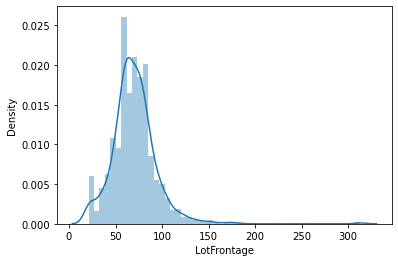

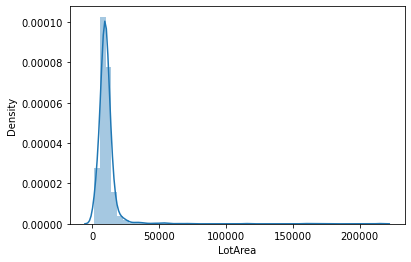

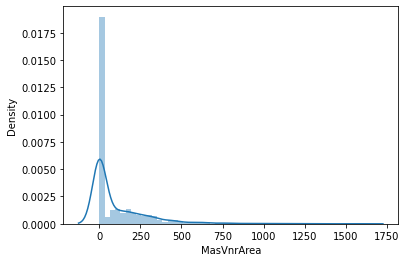

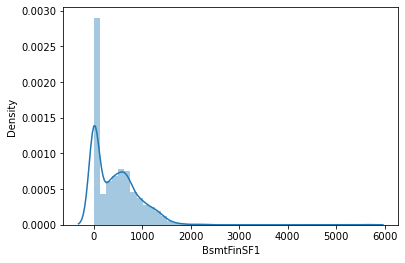

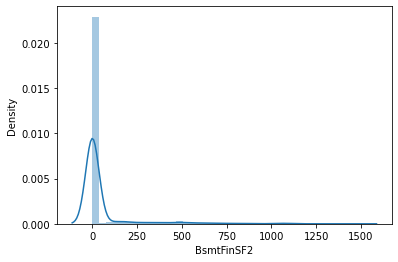

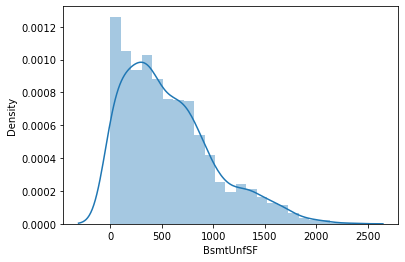

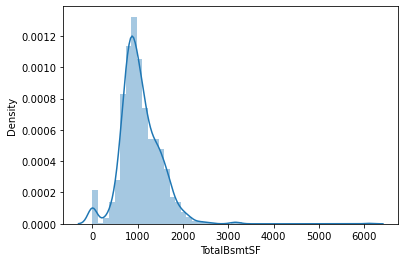

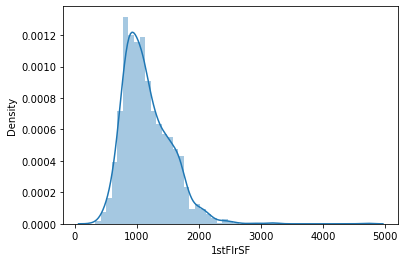

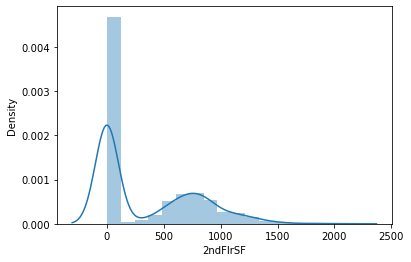

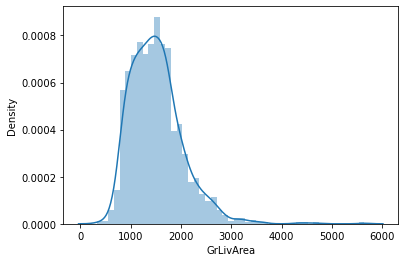

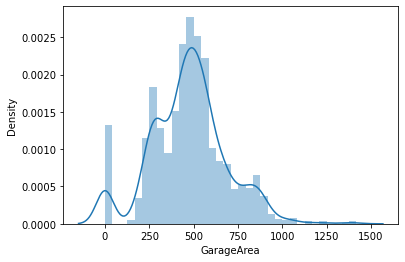

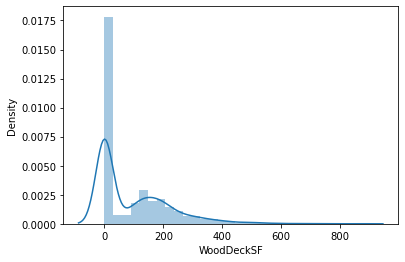

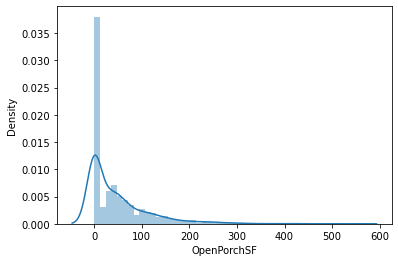

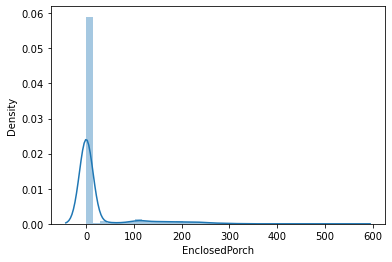

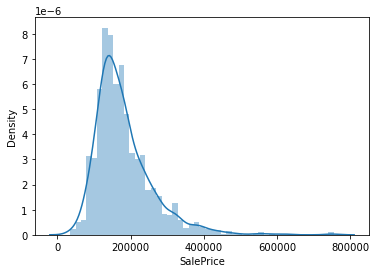

In [876]:
# plot the distribution plot for all the Numerical variables
for i in Num_variables:
    sns.distplot(data[i])
    plt.show()

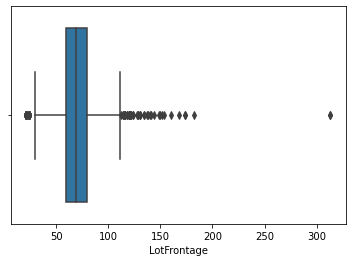

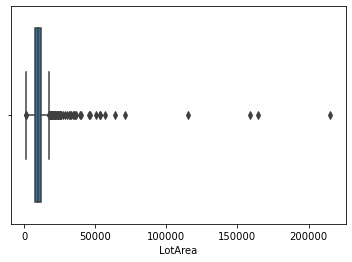

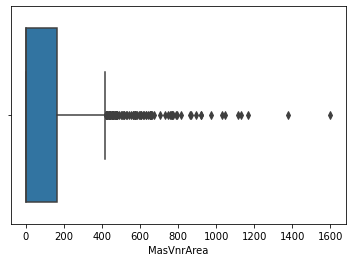

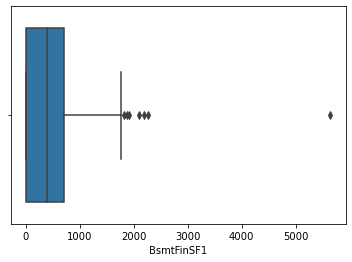

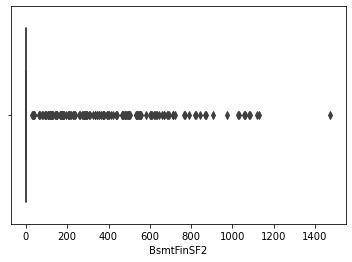

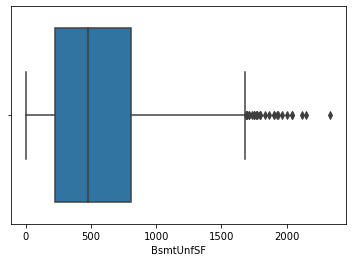

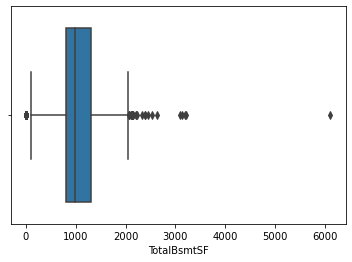

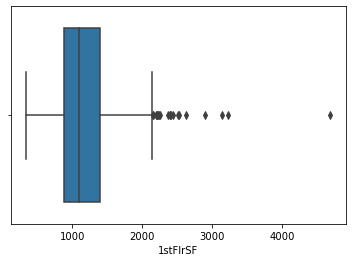

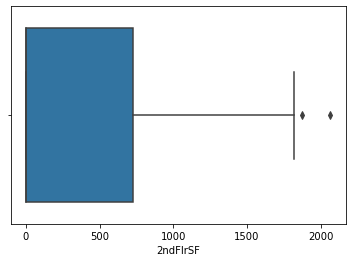

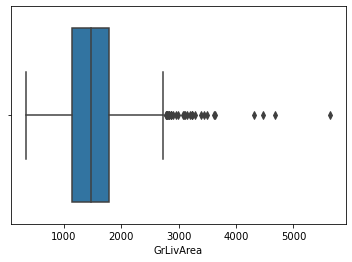

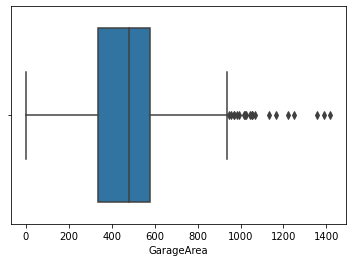

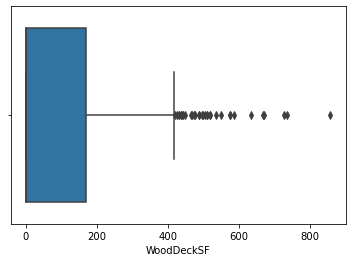

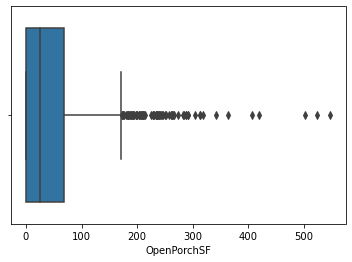

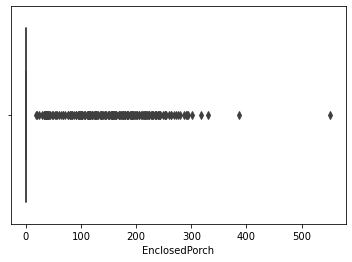

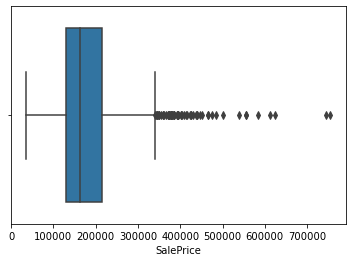

In [877]:
# Plot the Box-plot for all the Numerical variables
for i in Num_variables:
    sns.boxplot(data[i])
    plt.show()

### Observation
    1. LotArea,MasVnrArea,BsmtFinSF2,2ndFlrSF,WoodDeckSF,EnclosedPorch columns has more outliers.
    2. All the continuous variables need outlier treatment.

## 4.1.2 Descriptive quantile Statistical Analysis

In [878]:
# Display the discriptive statistical information of Numerical variables 
data[Num_variables].describe([.25,.5,.75,.8,.85,.9,.95,.99,1])

LotFrontage        LotArea   MasVnrArea   BsmtFinSF1   BsmtFinSF2  \
count  1201.000000    1460.000000  1452.000000  1460.000000  1460.000000   
mean     70.049958   10516.828082   103.685262   443.639726    46.549315   
std      24.284752    9981.264932   181.066207   456.098091   161.319273   
min      21.000000    1300.000000     0.000000     0.000000     0.000000   
25%      59.000000    7553.500000     0.000000     0.000000     0.000000   
50%      69.000000    9478.500000     0.000000   383.500000     0.000000   
75%      80.000000   11601.500000   166.000000   712.250000     0.000000   
80%      85.000000   12205.800000   206.000000   806.400000     0.000000   
85%      90.000000   13161.100000   262.350000   929.450000     0.000000   
90%      96.000000   14381.700000   335.000000  1065.500000   117.200000   
95%     107.000000   17401.150000   456.000000  1274.000000   396.200000   
99%     141.000000   37567.640000   791.920000  1572.410000   830.380000   
100%    313.000000  215245.000000  1600.000000  5644.000000  1474.000000   
max     313.000000  215245.000000  1600.000000  5644.000000  1474.000000   

         BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF    GrLivArea  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean    567.240411  1057.429452  1162.626712   346.992466  1515.463699   
std     441.866955   438.705324   386.587738   436.528436   525.480383   
min       0.000000     0.000000   334.000000     0.000000   334.000000   
25%     223.000000   795.750000   882.000000     0.000000  1129.500000   
50%     477.500000   991.500000  1087.000000     0.000000  1464.000000   
75%     808.000000  1298.250000  1391.250000   728.000000  1776.750000   
80%     896.000000  1391.200000  1482.400000   796.200000  1869.000000   
85%    1010.300000  1485.150000  1572.150000   870.150000  1987.300000   
90%    1232.000000  1602.200000  1680.000000   954.200000  2158.300000   
95%    1468.000000  1753.000000  1831.250000  1141.050000  2466.100000   
99%    1797.050000  2155.050000  2219.460000  1418.920000  3123.480000   
100%   2336.000000  6110.000000  4692.000000  2065.000000  5642.000000   
max    2336.000000  6110.000000  4692.000000  2065.000000  5642.000000   

        GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch      SalePrice  
count  1460.000000  1460.000000  1460.000000    1460.000000    1460.000000  
mean    472.980137    94.244521    46.660274      21.954110  180921.195890  
std     213.804841   125.338794    66.256028      61.119149   79442.502883  
min       0.000000     0.000000     0.000000       0.000000   34900.000000  
25%     334.500000     0.000000     0.000000       0.000000  129975.000000  
50%     480.000000     0.000000    25.000000       0.000000  163000.000000  
75%     576.000000   168.000000    68.000000       0.000000  214000.000000  
80%     620.200000   192.000000    83.200000       0.000000  230000.000000  
85%     672.000000   216.000000   105.000000       0.000000  250000.000000  
90%     757.100000   262.000000   130.000000     112.000000  278000.000000  
95%     850.100000   335.000000   175.050000     180.150000  326100.000000  
99%    1002.790000   505.460000   285.820000     261.050000  442567.010000  
100%   1418.000000   857.000000   547.000000     552.000000  755000.000000  
max    1418.000000   857.000000   547.000000     552.000000  755000.000000

**Observation**

    We can consider 95% as upper fence and give outlier treatment

In [879]:
#Display the value counts of all the Numerical variables
for i in Num_variables:
    print(i)
    print(data[i].value_counts())
    print("\n")

LotFrontage
60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
65.0      44
85.0      40
78.0      25
21.0      23
90.0      23
68.0      19
24.0      19
64.0      19
73.0      18
72.0      17
79.0      17
63.0      17
55.0      17
100.0     16
51.0      15
66.0      15
74.0      15
52.0      14
59.0      13
71.0      12
82.0      12
40.0      12
43.0      12
67.0      12
57.0      12
69.0      11
76.0      11
86.0      10
53.0      10
34.0      10
92.0      10
88.0      10
62.0       9
44.0       9
84.0       9
77.0       9
35.0       9
93.0       8
61.0       8
98.0       8
96.0       8
107.0      7
120.0      7
95.0       7
58.0       7
41.0       6
30.0       6
81.0       6
89.0       6
105.0      6
48.0       6
110.0      6
94.0       6
54.0       6
91.0       6
36.0       6
47.0       5
37.0       5
83.0       5
56.0       5
87.0       5
32.0       5
42.0       4
49.0       4
102.0      4
103.0      3
108.0      3
99.0       3
104.0      3
45.0       3
130.0      3


# 4.2 Bivariate Analysis

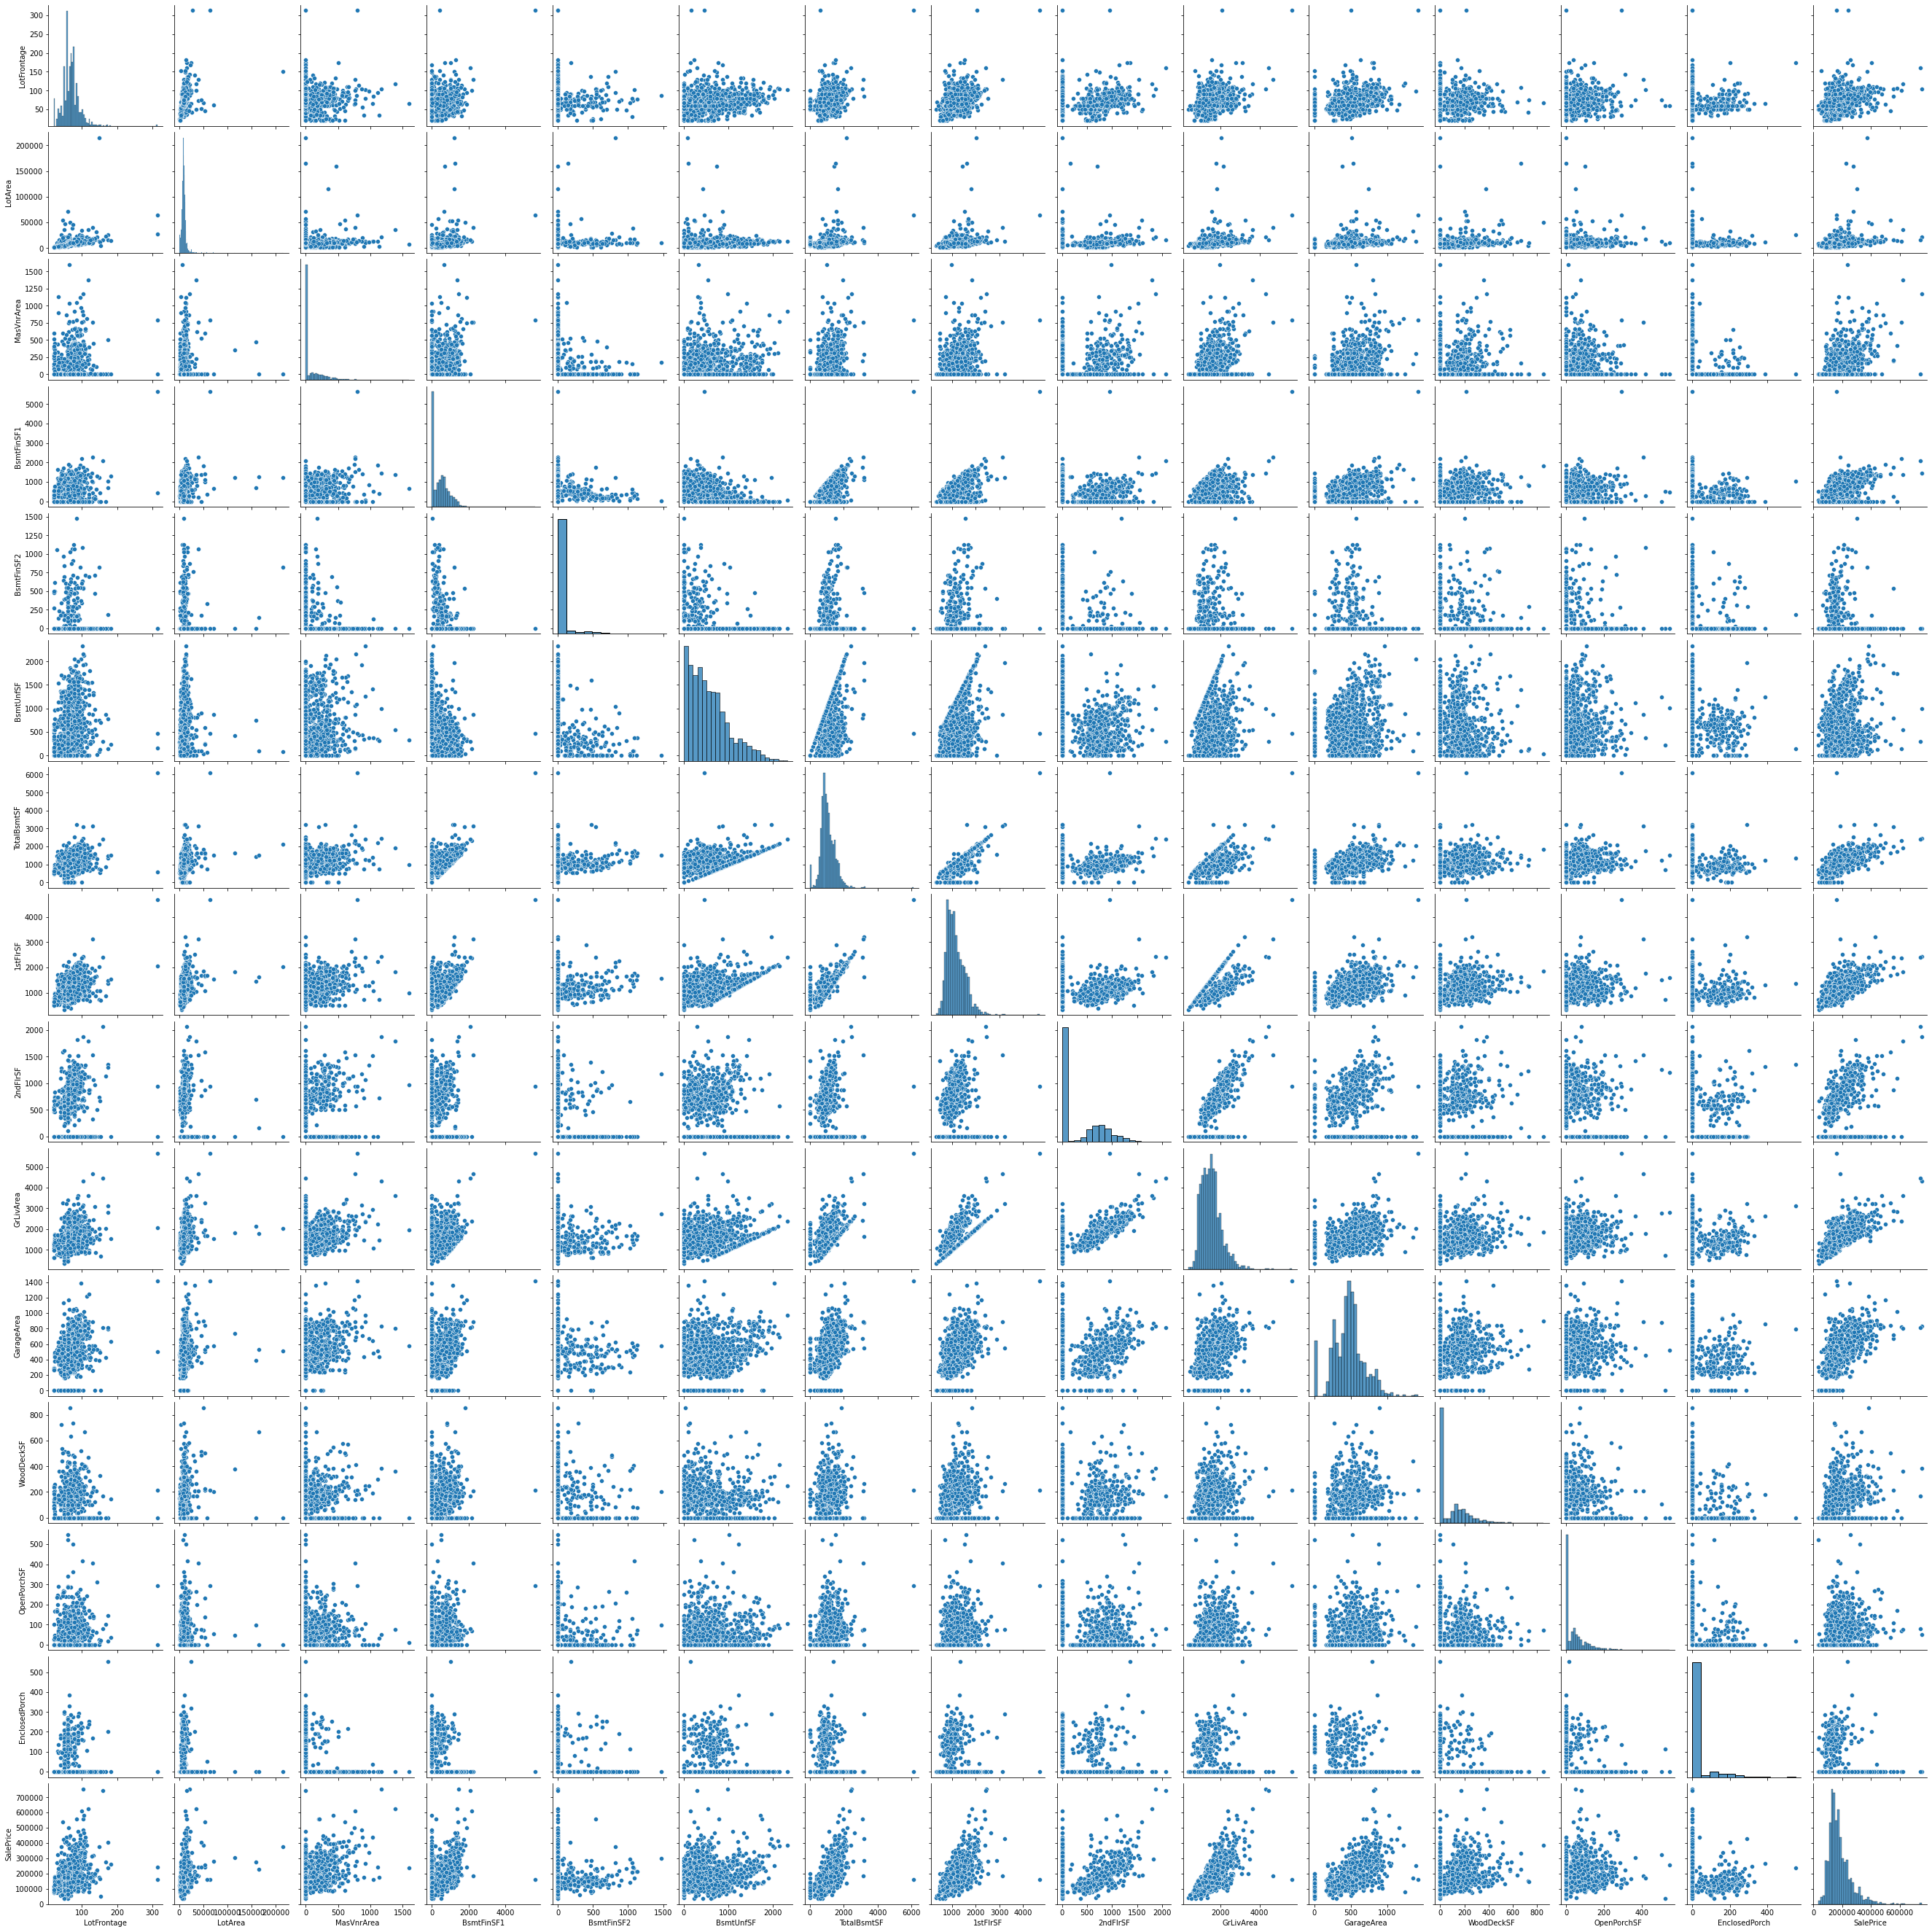

In [880]:
#Plot Pairplot for Numerical variables
sns.pairplot(data[Num_variables])
plt.show()

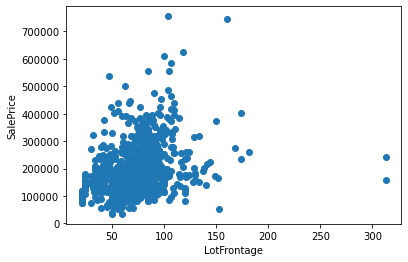

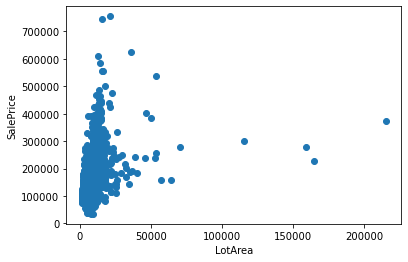

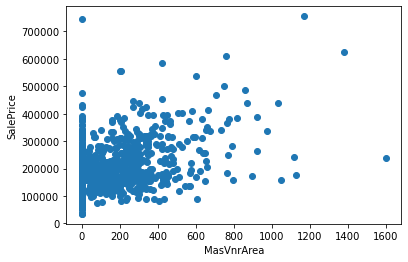

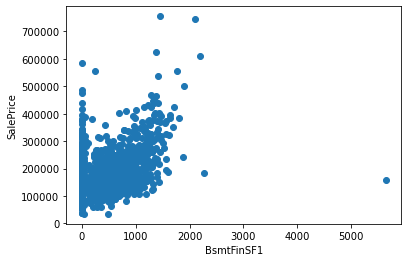

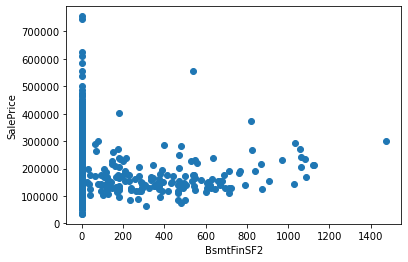

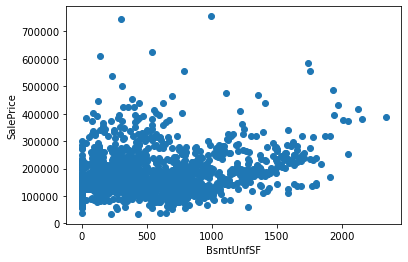

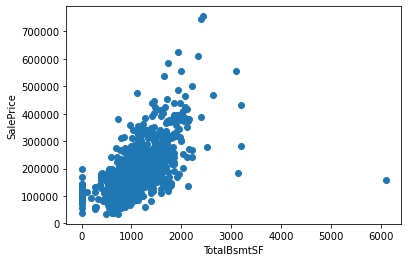

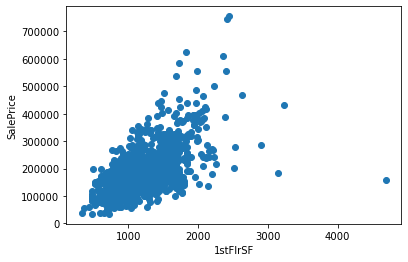

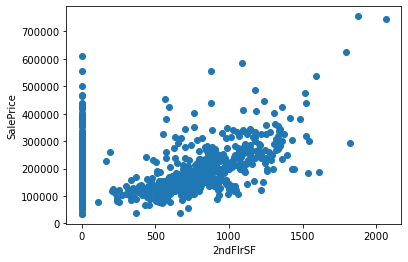

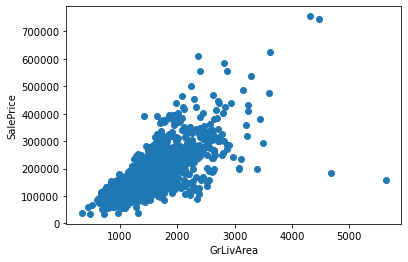

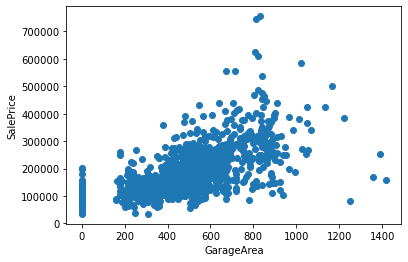

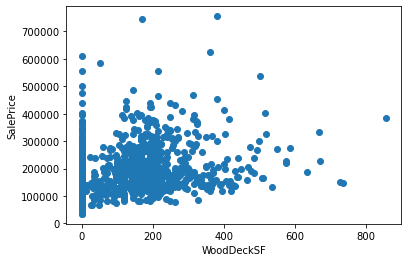

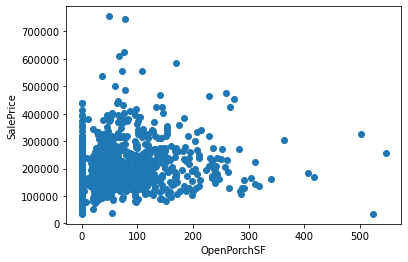

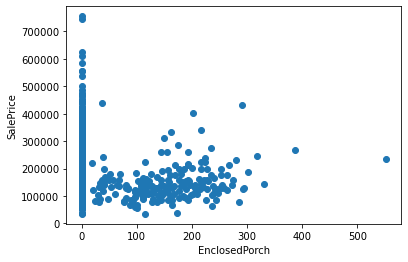

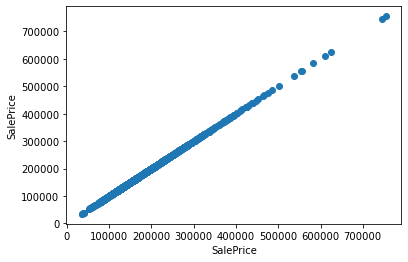

In [881]:
#Plot the scatter plot for all the numerical variables vs SalePrice
for i in Num_variables:
    plt.scatter(data[i],data['SalePrice'])
    plt.xlabel(i)
    plt.ylabel('SalePrice')
    plt.show()

In [882]:
#Create Correlation matrix for all numerical variables
cor = data[Num_variables].corr()

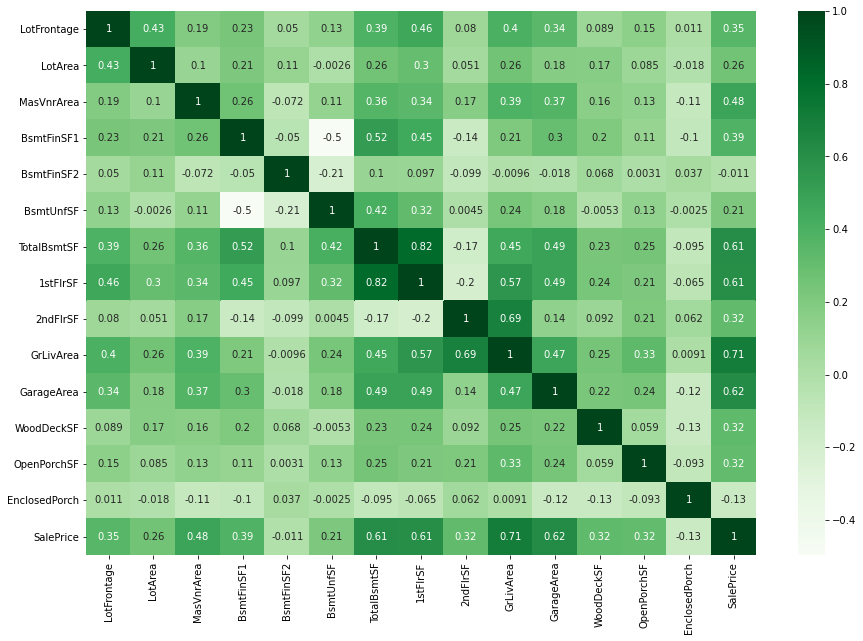

In [883]:
#Plot a heatmap for correlation matrix(All numerical variables)
plt.figure(figsize = (15,10))
sns.heatmap(cor,cmap = 'Greens', annot=True)
plt.show()

### Observation:
 **Heatmap shows some useful insights**
 
 * Correlation of SalePrice with independent variables
 
    1. TotalBsntSF,1stFlrSF,GrLiveArea,GarageArea shows positive correlation(Around 60 - 70 %) with target variable "SalePrice".
    2. MasVnrArea shows 48% positive correlation with the target variable SalePrice.
    3. LotFrontage,BsmtFinSF1,2ndFlrSF,WoodDeckSF,OpenPorchSF shows around 30 -40 % positive correlation with target variable SalePrice. 
  
  
 * Correlation among independent variables
  
    1. 1stFlrSF is 82% positively correlated with TotalBsmtSF
    2. GrLivArea is 69% positively correlated with 2ndFlrSF
    3. GrLivArea is 57% positively correlated with 1stFlrSF
    4. BsmtFinSF1 is 52% positively correlated with TotalBsmtSF
    5. BsmtFinSF1 is 50% negatively correlated with BsmtUnfSF
   

In [884]:
#Display the categorical variables
data.select_dtypes('object').columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

## 4.3 Univariate and bivariate analysis of some categorical variables

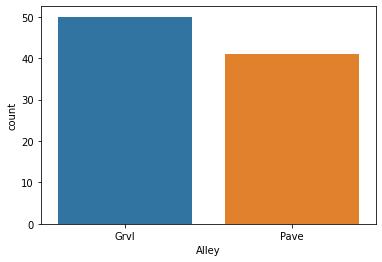

In [885]:
#Count Plot for Alley variable 
sns.countplot(x='Alley',data = data)
plt.show()

In [886]:
# Check the Sale Price for each category of Alley variable
data.groupby('Alley').SalePrice.sum()

Alley
Grvl    6110954
Pave    6888024
Name: SalePrice, dtype: int64

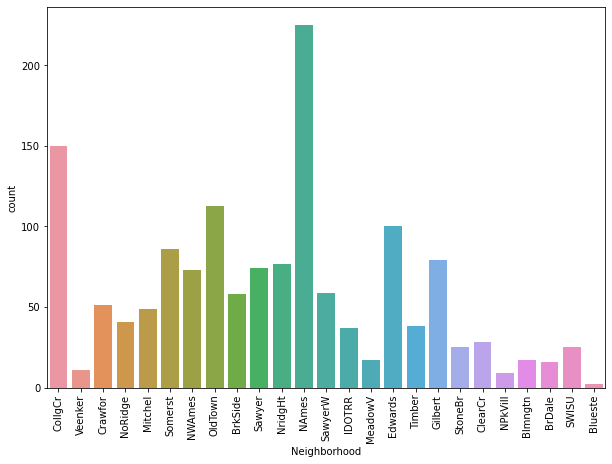

In [887]:
# Count plot for Neighborhood variable
plt.figure(figsize=(10,7))
sns.countplot(x='Neighborhood',data=data)
plt.xticks(rotation=90)
plt.show()

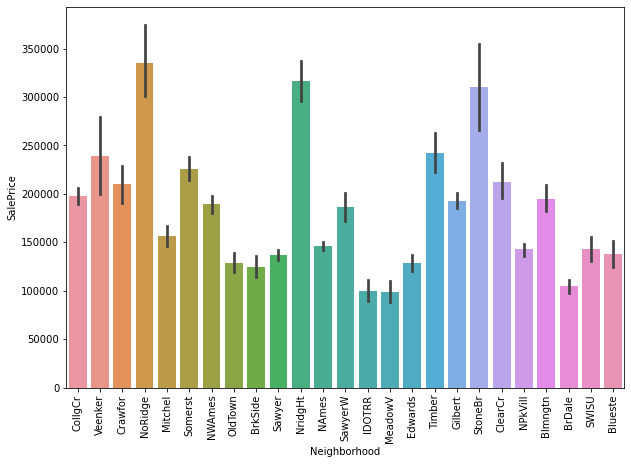

In [888]:
# Barplot for the Neighbourhood category and its corresponding SalePrice
plt.figure(figsize=(10,7))
sns.barplot(x='Neighborhood',y='SalePrice',data=data)
plt.xticks(rotation=90)
plt.show()

**Observation:**

1. The properties near NorthRidge(NoRidge), North ridge heights(NridgeHt),StoneBrook(StoneBr) having highest price.
2. More properties in demand near NorthAmes(NAmes),CollegeCrook,OldTown

**Suggession:**
1. The company can purchase properties near NorthAmes, CollegeCrook and OldTown which has high demand and low price.

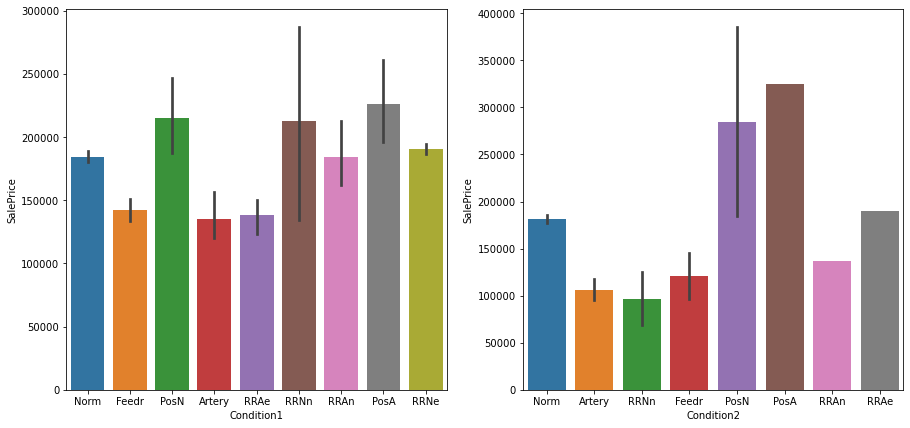

In [889]:
# bar plot for Condition1 and Condition2 variable with SalePrice
plt.figure(figsize = (15,7))
plt.subplot(1,2,1)
sns.barplot(data=data,x='Condition1',y='SalePrice')
plt.subplot(1,2,2)
sns.barplot(data =data,x='Condition2',y='SalePrice')
plt.show()

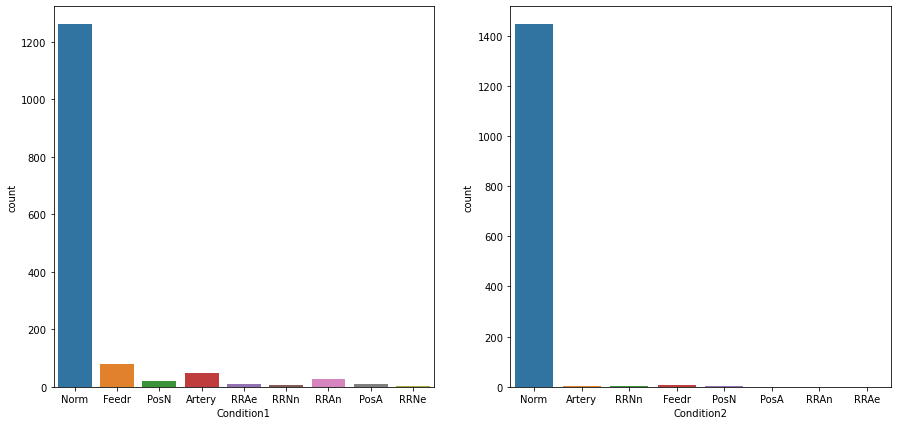

In [890]:
# Count plot for Condition1 and Condition2
plt.figure(figsize = (15,7))
plt.subplot(1,2,1)
sns.countplot(data=data,x='Condition1')
plt.subplot(1,2,2)
sns.countplot(data =data,x='Condition2')
plt.show()

**Observation:**

    1. PosA	- The properties with Adjacent to positive off-site feature has highest price
    2. PosN - The properties with Near positive off-site feature--park, greenbelt, etc. has second highest price.

In [891]:
#Check the value count of Condition1 variable
value_count_Con1 = data['Condition1'].value_counts()
# Check the %value count of Condition1 variable
per_count = pd.DataFrame({'Category':value_count_Con1.index,'Values':value_count_Con1.values,'%Values':value_count_Con1.values*100/value_count_Con1.sum()})

In [892]:
per_count # Display the % value count of Condition1

Category  Values    %Values
0     Norm    1260  86.301370
1    Feedr      81   5.547945
2   Artery      48   3.287671
3     RRAn      26   1.780822
4     PosN      19   1.301370
5     RRAe      11   0.753425
6     PosA       8   0.547945
7     RRNn       5   0.342466
8     RRNe       2   0.136986

In [893]:
#Check the value count of Condition1 variable
value_count_Con2 = data['Condition2'].value_counts()
# Check the %value count of Condition2 variable
per_count = pd.DataFrame({'Category':value_count_Con2.index,'Values':value_count_Con2.values,'%Values':value_count_Con2.values*100/value_count_Con2.sum()})

In [894]:
per_count # Display the % value count Condition2

Category  Values    %Values
0     Norm    1445  98.972603
1    Feedr       6   0.410959
2   Artery       2   0.136986
3     RRNn       2   0.136986
4     PosN       2   0.136986
5     RRAn       1   0.068493
6     RRAe       1   0.068493
7     PosA       1   0.068493

**Observation**

    Condition2 has 98% of value Normal feature. This variable will not help in our analysis we can drop it.

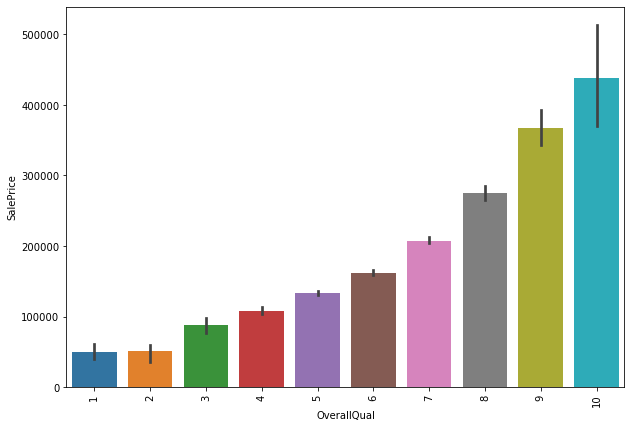

In [895]:
# Barplot for the OverallQual category and its corresponding SalePrice
plt.figure(figsize=(10,7))
sns.barplot(x='OverallQual',y='SalePrice',data=data)
plt.xticks(rotation=90)
plt.show()

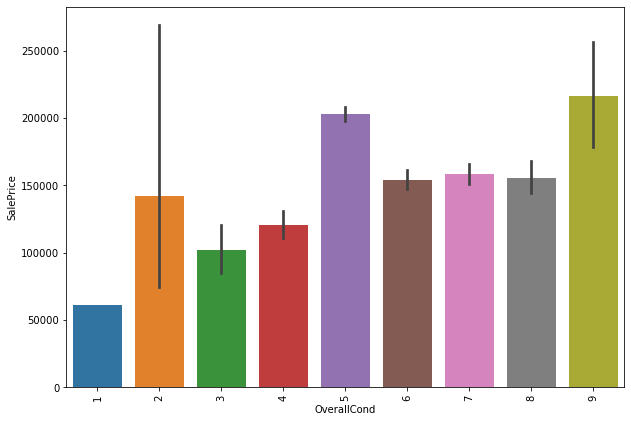

In [896]:
# Barplot for the OverallCond category and its corresponding SalePrice
plt.figure(figsize=(10,7))
sns.barplot(x='OverallCond',y='SalePrice',data=data)
plt.xticks(rotation=90)
plt.show()

**Observation**

    Over all quality of the house is highly impacting the Sale price.If the rating of the property is for overall quality is high the property price also high if the rating is low it negatively impacting the sale price. 

    The rating for ovarall condition of the property is not giving the result as expected. The sale price can't be predicted based on the condition of the property.

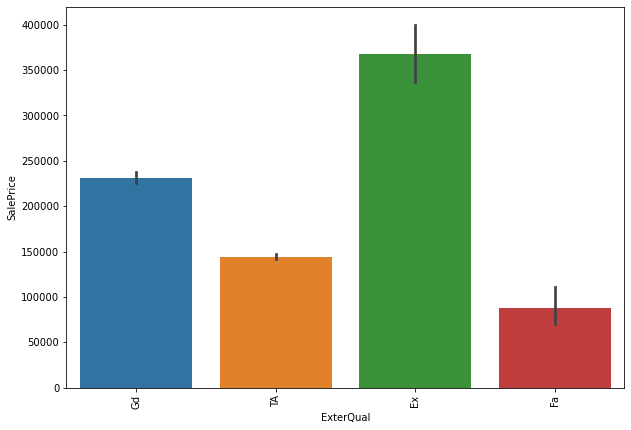

In [898]:
# Barplot for the ExterQual  category and its corresponding SalePrice
plt.figure(figsize=(10,7))
sns.barplot(x='ExterQual',y='SalePrice',data=data)
plt.xticks(rotation=90)
plt.show()

**Observation**

    If the quality of the material used on the exterior is Poor , average or typical this will negatively impact the Sale price of the property. If rating is Excellent then it positively impact the Sale Price.

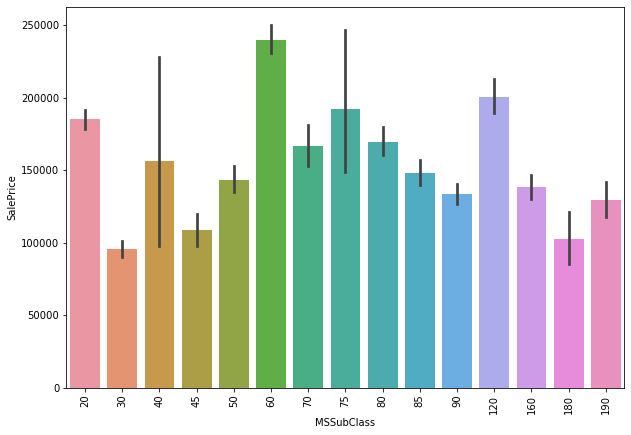

In [899]:
# Barplot for the MSSubClass   category and its corresponding SalePrice
plt.figure(figsize=(10,7))
sns.barplot(x='MSSubClass',y='SalePrice',data=data)
plt.xticks(rotation=90)
plt.show()

# 4.5 Conclusion

 EDA shows some of the features,
 
 1. The Ground living area, Basement finished area, Total basement area, Area of the first floor, Garage area, Lot Area are the important predictors positively impacting the price of the property. 
 2. Over all quality of the house, quality of the material used on the exterior is highly impacting the Sale price.
 

# 5. Data Cleaning

In [668]:
#Read the dataset given

data = pd.read_csv("train.csv")

In [669]:
# null_data contains the column name and its corresponding % of nullvalues
null_data = round(100 * data.isnull().sum()/data.shape[0],2).sort_values(ascending= False)


In [670]:
type(null_data)

pandas.core.series.Series

In [671]:
# Display all the columns which has null values 
null_data[null_data > 0]

PoolQC          99.52
MiscFeature     96.30
Alley           93.77
Fence           80.75
FireplaceQu     47.26
LotFrontage     17.74
GarageCond       5.55
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
BsmtExposure     2.60
BsmtFinType2     2.60
BsmtFinType1     2.53
BsmtCond         2.53
BsmtQual         2.53
MasVnrArea       0.55
MasVnrType       0.55
Electrical       0.07
dtype: float64

## Observation:

There are 4 columns which has null values greater than 70%. But among these many variables Null value indicates there is no such category according to the Data dictionary.

Alley: Type of alley access to property

     Grvl	Gravel
     Pave	Paved
     NA 	No alley access
 
Fence: Fence quality

     GdPrv	Good Privacy
     MnPrv	Minimum Privacy
     GdWo	Good Wood
     MnWw	Minimum Wood/Wire
     NA	    No Fence
 
MiscFeature: Miscellaneous feature not covered in other categories

     Elev	Elevator
     Gar2	2nd Garage (if not described in garage section)
     Othr	Other
     Shed	Shed (over 100 SF)
     TenC	Tennis Court
     NA	    None
 
 PoolQC: Pool quality

     Ex	Excellent
     Gd	Good
     TA	Average/Typical
     Fa	Fair
     NA	No Pool
 
## Decision:

1. The No pool category in PoolQL itself 99.56% is there. So this feature is of no use for our analysis. We can drop it.
2. MiscFeature has 96.30% of Null value So we can drop it.
3. We retain Alley and Fence, here null value means No such feature. So we can replace the Null value with associated label.

In [672]:
# Drop the columns  PoolQC and MiscFeature which has more than 90% null values
data =  data.drop(['PoolQC','MiscFeature'],axis =1)

In [673]:
data.shape

(1460, 79)

In [674]:
# null_data contains the column name and its corresponding % of nullvalues
null_data = round(100 * data.isnull().sum()/data.shape[0],2).sort_values(ascending= False)

# Display all the columns which has null values 
null_data[null_data > 0]

Alley           93.77
Fence           80.75
FireplaceQu     47.26
LotFrontage     17.74
GarageQual       5.55
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageCond       5.55
BsmtFinType2     2.60
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtCond         2.53
BsmtQual         2.53
MasVnrType       0.55
MasVnrArea       0.55
Electrical       0.07
dtype: float64

In [675]:
# Display all the rows which has null values  
null_rows = round(data.isnull().sum(axis =1)/data.shape[1] *100,2).sort_values(ascending = False)
null_rows[null_rows!=0]

705     16.46
1011    16.46
39      16.46
533     16.46
1218    16.46
520     15.19
1179    15.19
342     11.39
1143    11.39
1321    11.39
287     11.39
1030    11.39
1035    11.39
375     11.39
738     10.13
1407    10.13
434     10.13
102     10.13
441     10.13
1219    10.13
984     10.13
1049    10.13
125     10.13
897     10.13
108     10.13
894     10.13
1216    10.13
1232    10.13
868     10.13
148     10.13
1234    10.13
392     10.13
843     10.13
749     10.13
1009    10.13
1257    10.13
210     10.13
826     10.13
386     10.13
165     10.13
1000    10.13
156     10.13
155     10.13
1283    10.13
1090    10.13
710     10.13
99      10.13
1096    10.13
646     10.13
464     10.13
1326    10.13
259     10.13
613     10.13
528     10.13
48      10.13
960     10.13
535     10.13
1045    10.13
954     10.13
970     10.13
1449    10.13
1450    10.13
17      10.13
1453    10.13
582     10.13
942     10.13
614     10.13
1137    10.13
736     10.13
1123    10.13
976     10.13
89    

## 5.1 Data imputation

In [676]:
# Replace the null value of Alley with "NoAlleyAccess ,Fence with "NoFence, FireplaceQu with "NoFireplace 
data['Alley'] = data['Alley'].fillna("NoAlleyAccess")
data['Fence'] = data['Fence'].fillna("NoFence")
data['FireplaceQu'] = data['FireplaceQu'].fillna("NoFireplace")

In [677]:
# Find the median value of LotFrontage
LotFrontage_median = data.LotFrontage.median()

#Replace the null values of LotFrontage column with median value
data['LotFrontage'] = data['LotFrontage'].fillna(LotFrontage_median)

In [678]:
#Replace the null value of GarageFinish,GarageType,GarageCond, GarageQual columns with 'No Garage'
data['GarageFinish'] = data['GarageFinish'].fillna('No Garage')
data['GarageType'] = data['GarageType'].fillna('No Garage')
data['GarageCond'] = data['GarageCond'].fillna('No Garage')
data['GarageQual'] = data['GarageQual'].fillna('No Garage')

In [679]:
#Replace the null value of BsmtExposure, BsmtFinType2 ,BsmtFinType1,BsmtCond,BsmtQual columns with 'No Basement'   
data['BsmtExposure'] = data['BsmtExposure'].fillna('No Basement')
data['BsmtFinType2'] = data['BsmtFinType2'].fillna('No Basement')
data['BsmtFinType1'] = data['BsmtFinType1'].fillna('No Basement')
data['BsmtCond'] = data['BsmtCond'].fillna('No Basement')
data['BsmtQual'] = data['BsmtQual'].fillna('No Basement')

In [680]:
# null_data contains the column name and its corresponding % of nullvalues
null_data = round(100 * data.isnull().sum()/data.shape[0],2).sort_values(ascending= False)
null_data[null_data > 0]

GarageYrBlt    5.55
MasVnrType     0.55
MasVnrArea     0.55
Electrical     0.07
dtype: float64

In [681]:
# MasVnrType and MasVnrArea columns has the null values , We can just remove those rows which has MasVnrType null value  

data = data[~data['MasVnrType'].isnull()]


In [682]:
data['Electrical'].value_counts() # Value counts of Electrical variable

SBrkr    1326
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [683]:
data['Electrical'].mode()[0] # Mode value of Electrical variable

'SBrkr'

In [684]:
#Replace the Null value of Electrical with mode value i.e., SBrkr - Standard Circuit Breaker and Romex

data['Electrical'] = data['Electrical'].fillna(data['Electrical'].mode()[0])

In [685]:
# null_data contains the column name and its corresponding % of nullvalues
null_data = round(100 * data.isnull().sum()/data.shape[0],2).sort_values(ascending= False)
null_data[null_data > 0]

GarageYrBlt    5.58
dtype: float64

In [686]:
data['GarageYrBlt'].min()

1900.0

In [687]:
#Replace the Null value of GarageYrBlt with 0 because GarageYrBlt Null means there is no Garage 

data['GarageYrBlt'] = data['GarageYrBlt'].fillna(data['GarageYrBlt'].min())

In [688]:
# null_data contains the column name and its corresponding % of nullvalues
null_data = round(100 * data.isnull().sum()/data.shape[0],2).sort_values(ascending= False)
null_data[null_data > 0]

Series([], dtype: float64)


**We removed all the null values from our dataset by dropping some of the columns and by Imputation.**

**Now we have to handle Invalid values and Invalid datatypes**


In [689]:
#Check the data information
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1452 entries, 0 to 1459
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1452 non-null   int64  
 1   MSSubClass     1452 non-null   int64  
 2   MSZoning       1452 non-null   object 
 3   LotFrontage    1452 non-null   float64
 4   LotArea        1452 non-null   int64  
 5   Street         1452 non-null   object 
 6   Alley          1452 non-null   object 
 7   LotShape       1452 non-null   object 
 8   LandContour    1452 non-null   object 
 9   Utilities      1452 non-null   object 
 10  LotConfig      1452 non-null   object 
 11  LandSlope      1452 non-null   object 
 12  Neighborhood   1452 non-null   object 
 13  Condition1     1452 non-null   object 
 14  Condition2     1452 non-null   object 
 15  BldgType       1452 non-null   object 
 16  HouseStyle     1452 non-null   object 
 17  OverallQual    1452 non-null   int64  
 18  OverallC

## 5.2 Map the numerical values of categorical variables to the associated labels

In [690]:
#Display the columns of numerical type
data.select_dtypes(include=['int64','float64']).columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

### Among the above numerical variables the following are categorical variables 

    'MSSubClass', 'OverallQual', 'OverallCond',
     
**Date columns**

    'MoSold',YrSold,YearBuilt,YearRemodAdd,'GarageYrBlt'

### Let us observe the dictionary for categorical variables one by one

MSSubClass: Identifies the type of dwelling involved in the sale.

    A 20	1-STORY 1946 & NEWER ALL STYLES 
    B 30	1-STORY 1945 & OLDER
    C 40	1-STORY W/FINISHED ATTIC ALL AGES
    D 45	1-1/2 STORY - UNFINISHED ALL AGES
    E 50	1-1/2 STORY FINISHED ALL AGES
    F 60	2-STORY 1946 & NEWER
    G 70	2-STORY 1945 & OLDER
    H 75	2-1/2 STORY ALL AGES
    I 80	SPLIT OR MULTI-LEVEL
    J 85	SPLIT FOYER
    K 90	DUPLEX - ALL STYLES AND AGES
    L 120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
    M 150	1-1/2 STORY PUD - ALL AGES
    N 160	2-STORY PUD - 1946 & NEWER
    O 180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
    P 190	2 FAMILY CONVERSION - ALL STYLES AND AGES


In [691]:
# Map the MSSubClass numerical values to the associated lebel

data['MSSubClass'] = data['MSSubClass'].map({20:'A',30:'B',40:'C',45: 'D',50:'E',60:'F',70:'G',75:'H',80:'I',85:'J',90:'K',
                                             120:'L',150:'M',160:'N',180:'O',190:'P'})

OverallQual: Rates the overall material and finish of the house

     10	Very Excellent
     9	Excellent
     8	Very Good
     7	Good
     6	Above Average
     5	Average
     4	Below Average
     3	Fair
     2	Poor
     1	Very Poor

OverallCond: Rates the overall condition of the house

     10	Very Excellent
     9	Excellent
     8	Very Good
     7	Good
     6	Above Average	
     5	Average
     4	Below Average	
     3	Fair
     2	Poor
     1	Very Poor

In [692]:
# Map the OverallQual and OverallCond numerical values to the associated lebel

data['OverallQual'] = data['OverallQual'].map({10: 'Very Excellent',9:'Excellent',8:'Very Good',7:'Good',6:'Above Average',5:'Average',4:'Below Average',3:'Fair',2:'Poor',1:'Very Poor'})
data['OverallCond'] = data['OverallCond'].map({10: 'Very Excellent',9:'Excellent',8:'Very Good',7:'Good',6:'Above Average',5:'Average',4:'Below Average',3:'Fair',2:'Poor',1:'Very Poor'})

## 5.3 Create new derived variables

## Create new derived variable AgeOfHouse, AgeOfRemod and AgeOfGarageYrBlt

    AgeOfHouse = Year of House Sold - Year of House Built
    AgeOfRemod = Year of House Sold - Year of House Remodeled
    AgeOfGarage = Year of House Sold - Year of Garage Built

In [693]:
# Create new derived variables AgeOfHouse and AgeOfRemod
data['AgeOfHouse'] = data['YrSold'] - data['YearBuilt']
data['AgeOfRemod'] = data['YrSold'] - data['YearRemodAdd'] 


In [694]:
#Create new derved variable AgeOfGarage 
data['AgeofGarage'] = data['YrSold'] - data['GarageYrBlt']

In [695]:
# Now Drop YrSold,YrBuilt,YearRemodAdd and GarageYrBlt from the dataset
data = data.drop(['YrSold','YearBuilt','YearRemodAdd','GarageYrBlt'],axis =1)

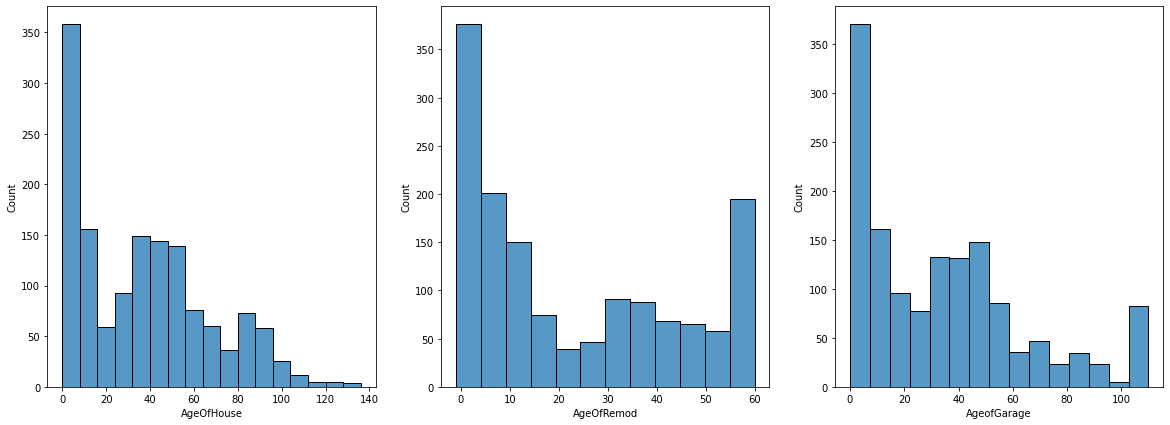

In [696]:
# Plot the histogram of AgeOfHouse , AgeOfRemod and AgeOfGarage
plt.figure(figsize = (20,7))
plt.subplot(1,3,1)
sns.histplot(x = data['AgeOfHouse'])
plt.set_title = "Age of House"
plt.subplot(1,3,2)

sns.histplot(x = data['AgeOfRemod'])
plt.set_title = "Age of House Remodel"
plt.subplot(1,3,3)

sns.histplot(x = data['AgeofGarage'])
plt.set_title = "Age of Garage"
plt.show()

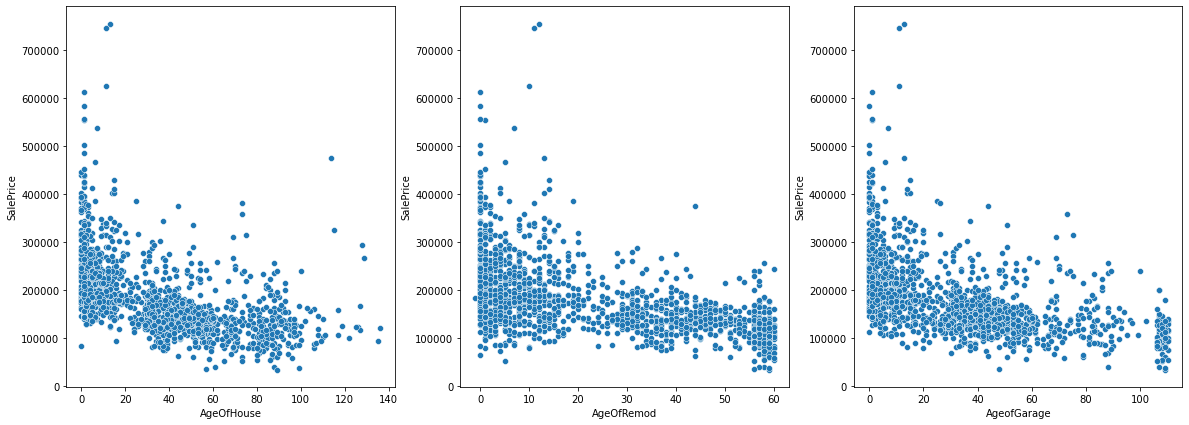

In [697]:
# Plot the histogram of AgeOfHouse , AgeOfRemod and AgeOfGarage
plt.figure(figsize = (20,7))

plt.subplot(1,3,1)
sns.scatterplot(x = data['AgeOfHouse'],y=data['SalePrice'])
plt.set_title = "Age of House"

plt.subplot(1,3,2)
sns.scatterplot(x = data['AgeOfRemod'],y=data['SalePrice'])
plt.set_title = "Age of House Remodel"

plt.subplot(1,3,3)
sns.scatterplot(x = data['AgeofGarage'],y=data['SalePrice'])
plt.set_title = "Age of Garage"
plt.show()


**Observation**

    As the age of the house increases the SalePrice decreases. So the newer house has high demand and high SalePrice

In [698]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPor

In [699]:
# Display the values and %ofValues of each variable
for i in data.columns:
    counts_value =   data[i].value_counts()
    per_value = pd.DataFrame({'Category': counts_value.index,'Values':counts_value.values,'%Values': counts_value.values *100 /counts_value.sum()})
    print(i)
    print(per_value)
    print("\n")

Id
      Category  Values   %Values
0         1460       1  0.068871
1          478       1  0.068871
2          480       1  0.068871
3          481       1  0.068871
4          482       1  0.068871
5          483       1  0.068871
6          484       1  0.068871
7          485       1  0.068871
8          486       1  0.068871
9          487       1  0.068871
10         488       1  0.068871
11         489       1  0.068871
12         490       1  0.068871
13         491       1  0.068871
14         492       1  0.068871
15         493       1  0.068871
16         494       1  0.068871
17         495       1  0.068871
18         496       1  0.068871
19         497       1  0.068871
20         498       1  0.068871
21         479       1  0.068871
22         477       1  0.068871
23         455       1  0.068871
24         476       1  0.068871
25         457       1  0.068871
26         458       1  0.068871
27         459       1  0.068871
28         460       1  0.068871
29     

## 5.4 Drop some variables which will not helps in our analysis

    1. Drop the variable Id 
    
**Drop the continuous variables which has more than 95% of its value is 0**

     2.   Heating, LowQualFinSF, KitchenAbvGr, 3SsnPorch, PoolArea, MiscVal
     
 **Drop the categorical variables which has more than 95% of its value is single value**

       Street column has 99.587% Pave
       Utilities column has 99.93% AllPub
       RoofMatl column has 98.20% CompShg
       Condition2 column has 98.97% Norm

**Decision**

    Drop Street,Utilities,RoofMatl,Heating, LowQualFinSF, KitchenAbvGr, 3SsnPorch, PoolArea, MiscVal columns   
     

In [700]:
# Drop the variables which does't help in our analysis
data.drop(['Id','Street', 'Utilities', 'Condition2', 'RoofMatl', 'Heating', 'LowQualFinSF', 'KitchenAbvGr', '3SsnPorch', 'PoolArea', 'MiscVal'],axis=1,inplace = True)

In [701]:
data.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Alley', 'LotShape',
       'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars',
       'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'Fence', 'MoSold',
       'SaleType', 'SaleCondition', 'SalePrice', 'AgeOfHouse', 'AgeOfRemo

In [702]:
# Map the Month number of MoSold to associated Month Label 
data['MoSold'] = data['MoSold'].map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})

# 5.5 Outlier Treatment

'LotArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF','1stFlrSF', '2ndFlrSF', 'GrLivArea','Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF','OpenPorchSF', 'EnclosedPorch', 'ScreenPorch','SalePrice' columns needs outlier treatment.



In [703]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1452 entries, 0 to 1459
Data columns (total 67 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1452 non-null   object 
 1   MSZoning       1452 non-null   object 
 2   LotFrontage    1452 non-null   float64
 3   LotArea        1452 non-null   int64  
 4   Alley          1452 non-null   object 
 5   LotShape       1452 non-null   object 
 6   LandContour    1452 non-null   object 
 7   LotConfig      1452 non-null   object 
 8   LandSlope      1452 non-null   object 
 9   Neighborhood   1452 non-null   object 
 10  Condition1     1452 non-null   object 
 11  BldgType       1452 non-null   object 
 12  HouseStyle     1452 non-null   object 
 13  OverallQual    1452 non-null   object 
 14  OverallCond    1452 non-null   object 
 15  RoofStyle      1452 non-null   object 
 16  Exterior1st    1452 non-null   object 
 17  Exterior2nd    1452 non-null   object 
 18  MasVnrTy

In [704]:
#Display the numerical variables
data.select_dtypes(['int64','float64']).columns

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'SalePrice',
       'AgeOfHouse', 'AgeOfRemod', 'AgeofGarage'],
      dtype='object')

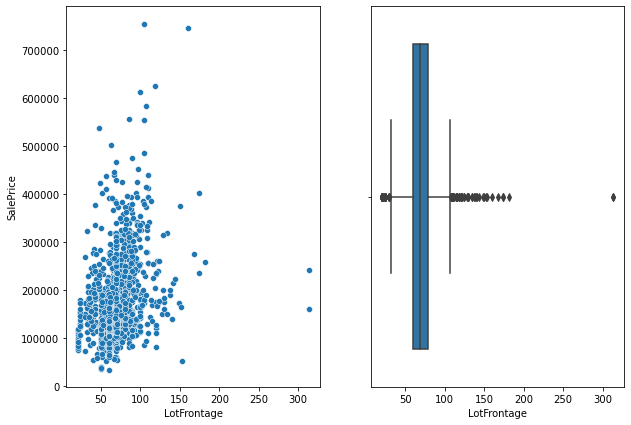



0.000     21.000
0.250     60.000
0.500     69.000
0.750     79.000
0.900     92.000
0.950    104.000
0.980    120.980
0.990    137.490
0.995    152.745
1.000    313.000
Name: LotFrontage, dtype: float64


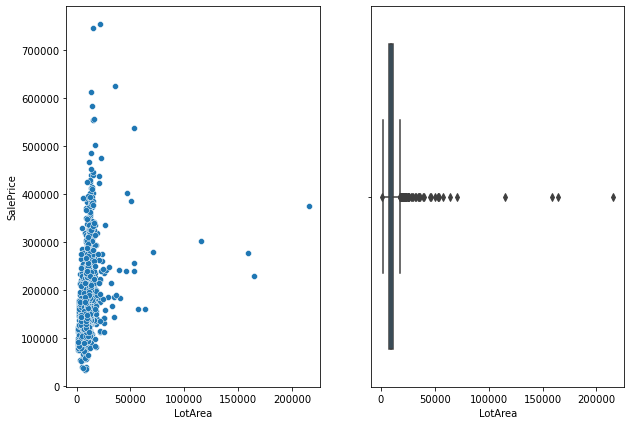



0.000      1300.000
0.250      7538.750
0.500      9478.500
0.750     11600.000
0.900     14373.900
0.950     17299.350
0.980     25093.100
0.990     37775.960
0.995     53433.365
1.000    215245.000
Name: LotArea, dtype: float64


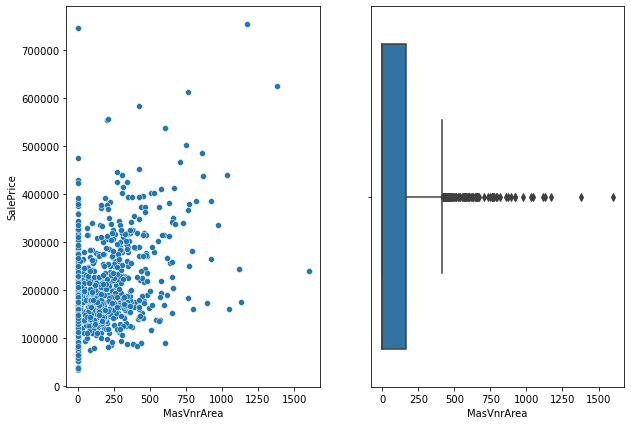



0.000       0.000
0.250       0.000
0.500       0.000
0.750     166.000
0.900     335.000
0.950     456.000
0.980     650.980
0.990     791.920
0.995     961.485
1.000    1600.000
Name: MasVnrArea, dtype: float64


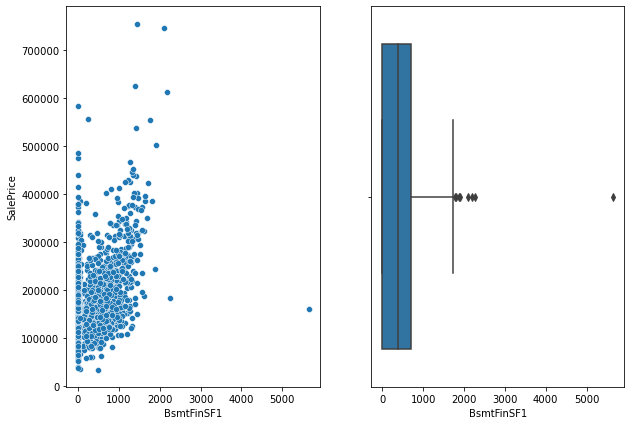



0.000       0.00
0.250       0.00
0.500     381.00
0.750     706.50
0.900    1063.50
0.950    1271.80
0.980    1442.96
0.990    1572.49
0.995    1755.27
1.000    5644.00
Name: BsmtFinSF1, dtype: float64


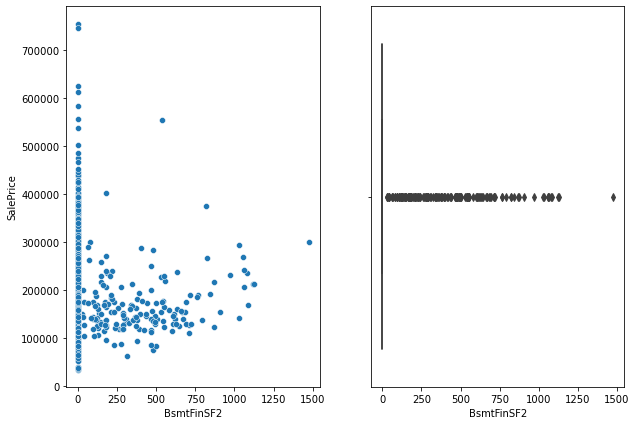



0.000       0.00
0.250       0.00
0.500       0.00
0.750       0.00
0.900     118.80
0.950     397.80
0.980     660.68
0.990     831.82
0.995    1050.37
1.000    1474.00
Name: BsmtFinSF2, dtype: float64


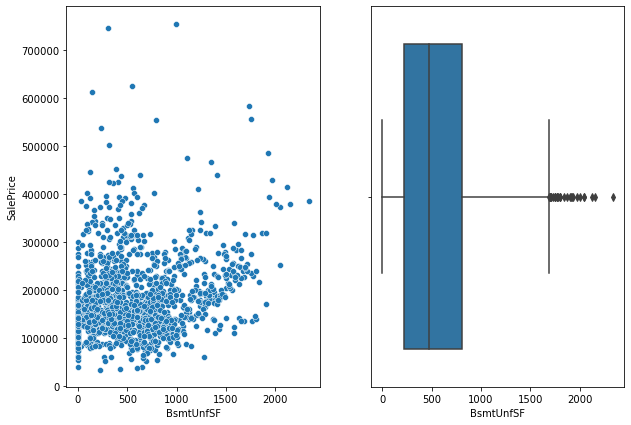



0.000       0.000
0.250     222.500
0.500     477.500
0.750     808.000
0.900    1231.600
0.950    1468.000
0.980    1679.800
0.990    1797.450
0.995    1932.705
1.000    2336.000
Name: BsmtUnfSF, dtype: float64


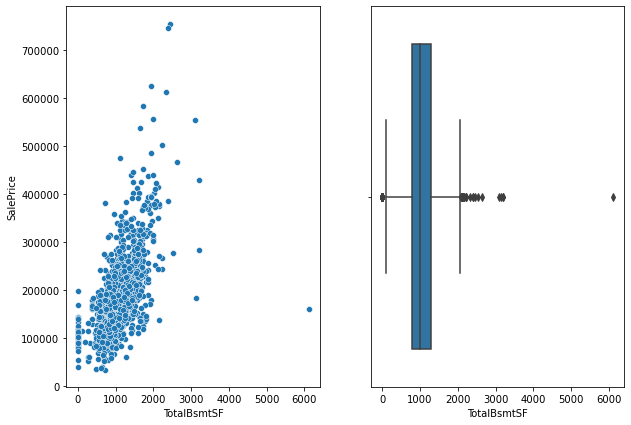



0.000       0.00
0.250     794.75
0.500     990.50
0.750    1297.25
0.900    1601.80
0.950    1748.70
0.980    1991.88
0.990    2155.45
0.995    2431.76
1.000    6110.00
Name: TotalBsmtSF, dtype: float64


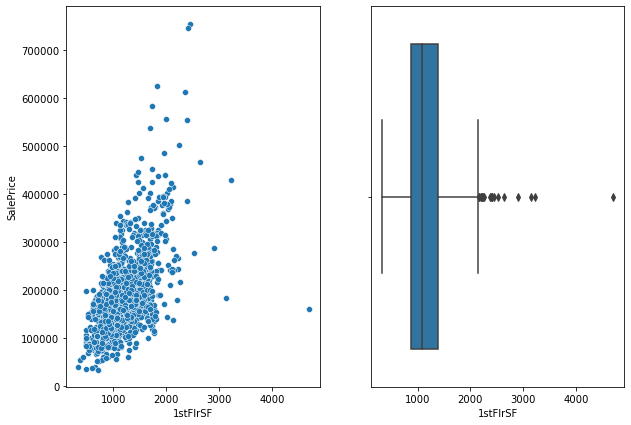



0.000     334.000
0.250     882.000
0.500    1086.000
0.750    1391.000
0.900    1679.900
0.950    1826.900
0.980    2068.680
0.990    2211.900
0.995    2408.705
1.000    4692.000
Name: 1stFlrSF, dtype: float64


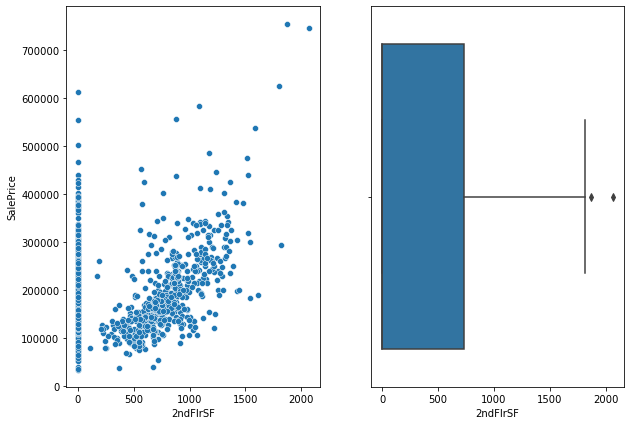



0.000       0.000
0.250       0.000
0.500       0.000
0.750     728.000
0.900     953.600
0.950    1141.450
0.980    1319.840
0.990    1419.880
0.995    1534.175
1.000    2065.000
Name: 2ndFlrSF, dtype: float64


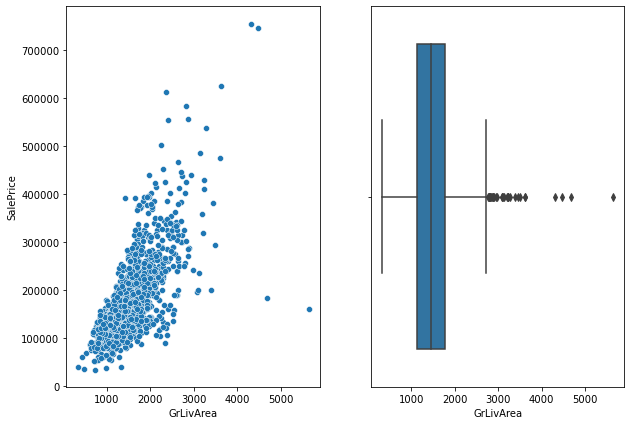



0.000     334.00
0.250    1128.00
0.500    1461.50
0.750    1776.00
0.900    2157.90
0.950    2463.80
0.980    2783.82
0.990    3125.72
0.995    3433.74
1.000    5642.00
Name: GrLivArea, dtype: float64


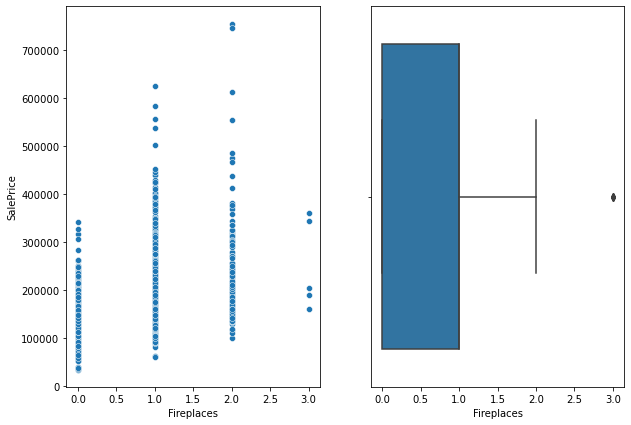



0.000    0.0
0.250    0.0
0.500    1.0
0.750    1.0
0.900    1.0
0.950    2.0
0.980    2.0
0.990    2.0
0.995    2.0
1.000    3.0
Name: Fireplaces, dtype: float64


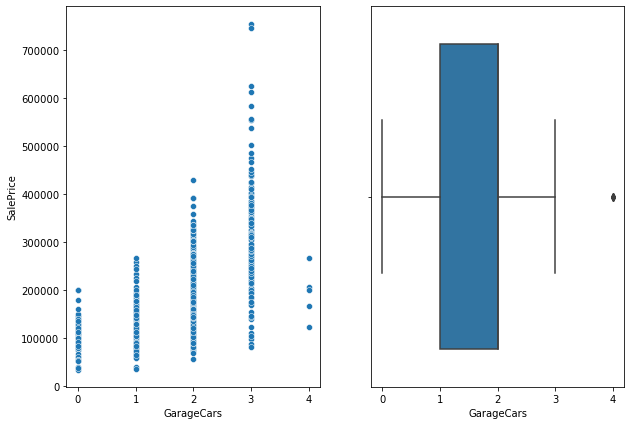



0.000    0.0
0.250    1.0
0.500    2.0
0.750    2.0
0.900    3.0
0.950    3.0
0.980    3.0
0.990    3.0
0.995    3.0
1.000    4.0
Name: GarageCars, dtype: float64


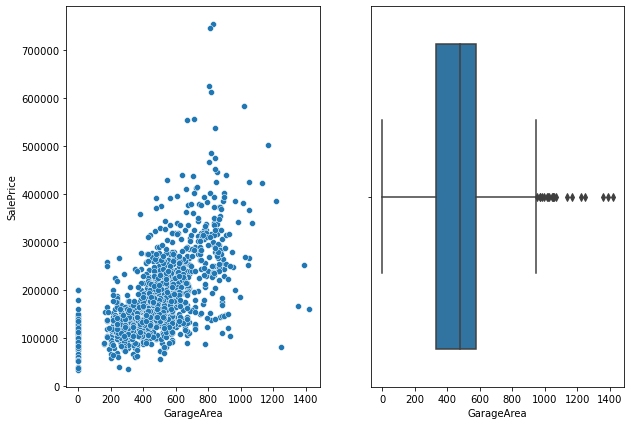



0.000       0.00
0.250     327.75
0.500     478.00
0.750     576.00
0.900     756.90
0.950     848.70
0.980     907.94
0.990    1004.31
0.995    1064.92
1.000    1418.00
Name: GarageArea, dtype: float64


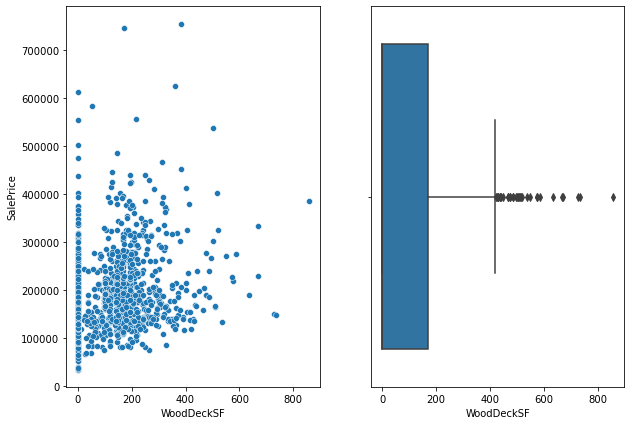



0.000      0.00
0.250      0.00
0.500      0.00
0.750    168.00
0.900    261.90
0.950    335.00
0.980    430.90
0.990    505.94
0.995    575.49
1.000    857.00
Name: WoodDeckSF, dtype: float64


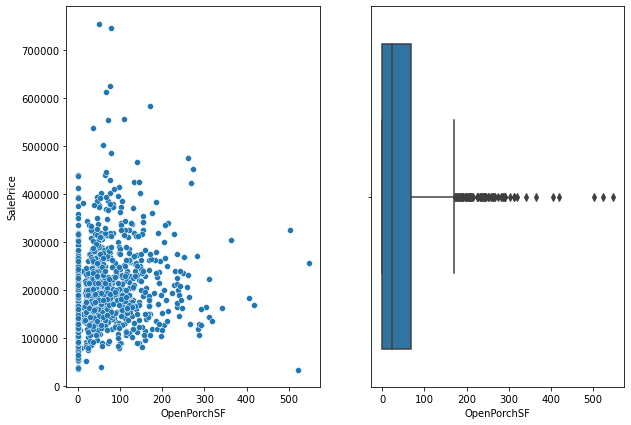



0.000      0.000
0.250      0.000
0.500     24.000
0.750     68.000
0.900    130.000
0.950    172.900
0.980    240.980
0.990    285.980
0.995    317.215
1.000    547.000
Name: OpenPorchSF, dtype: float64


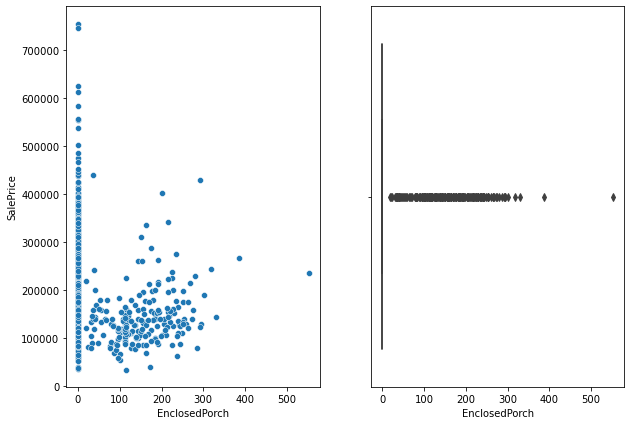



0.000      0.000
0.250      0.000
0.500      0.000
0.750      0.000
0.900    112.000
0.950    180.000
0.980    235.960
0.990    261.450
0.995    289.725
1.000    552.000
Name: EnclosedPorch, dtype: float64


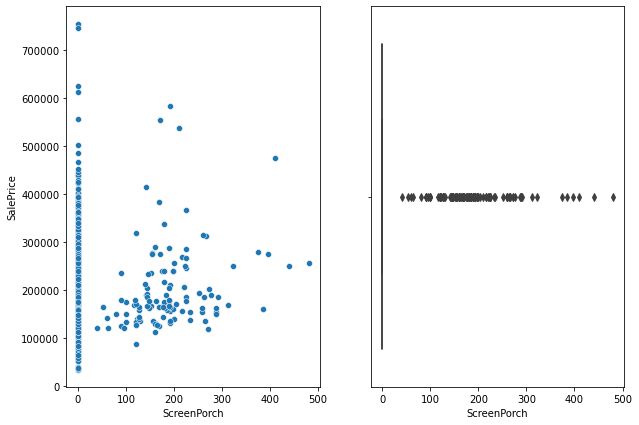



0.000      0.000
0.250      0.000
0.500      0.000
0.750      0.000
0.900      0.000
0.950    160.000
0.980    223.960
0.990    268.450
0.995    306.645
1.000    480.000
Name: ScreenPorch, dtype: float64


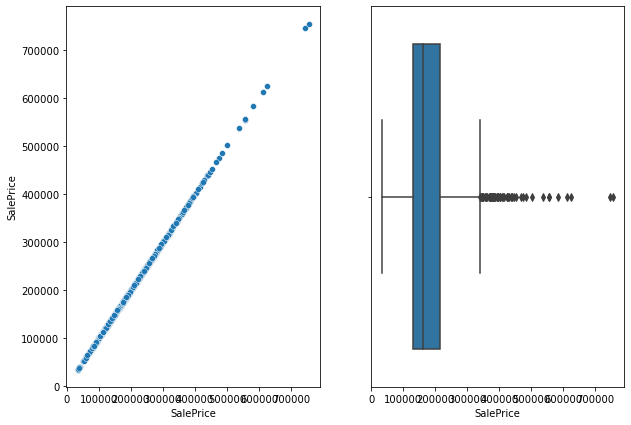



0.000     34900.000
0.250    129900.000
0.500    162700.000
0.750    214000.000
0.900    277950.000
0.950    325793.200
0.980    394613.300
0.990    439377.800
0.995    528778.435
1.000    755000.000
Name: SalePrice, dtype: float64


In [705]:
# Display the scatterplot,box plot and percentile values of the following variables
out_var = ['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF','1stFlrSF', '2ndFlrSF', 'GrLivArea','Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF','OpenPorchSF', 'EnclosedPorch', 'ScreenPorch','SalePrice']
for i in out_var:
    plt.figure(figsize =(10,7))
    plt.subplot(1,2,1)
    sns.scatterplot(x = data[i],y = data['SalePrice'])

    plt.subplot(1,2,2)
    sns.boxplot(data[i])
    plt.show()
    print('\n')
    print(data[i].quantile([0,0.25,0.50,0.75,0.90,0.95,0.98,0.99,0.995,1]))

**Observation:**

   BsmtFinSF2 and EnclosedPorch variable has more than 75% of its value is 0. Convert these 2 variables to categorical variable

In [706]:
data['BsmtFinSF2'].value_counts()

0       1285
180        5
374        3
551        2
93         2
468        2
147        2
480        2
539        2
712        2
117        2
279        2
96         2
391        2
287        2
290        2
294        2
64         2
41         2
182        2
469        2
228        1
208        1
210        1
211        1
202        1
215        1
193        1
219        1
184        1
258        1
230        1
232        1
239        1
240        1
264        1
273        1
276        1
306        1
311        1
324        1
334        1
181        1
1085       1
1120       1
125        1
28         1
32         1
35         1
40         1
68         1
80         1
81         1
105        1
106        1
108        1
110        1
119        1
121        1
123        1
127        1
177        1
128        1
132        1
139        1
144        1
149        1
150        1
163        1
165        1
168        1
169        1
173        1
174        1
344        1
175        1
336        1

In [707]:
# Function to make a category for an element e
def make_cat(e):
    if (e == 0):
        return '0'
    elif ((e<=200) and (e>0)):
        return '1 - 200'
    elif ((e<=400) and (e>200)):
        return '200 - 400' 
    elif ((e<=600) and (e>400)):
        return '400 - 600' 
    elif ((e<=800) and (e>600)):
        return '600 - 800' 
    elif ((e<=1000) and (e>800)):
        return '800 - 1000' 
    elif ((e>1000)):
        return '>1000' 
    
# Convert BsmtFinSF2 and EnclosedPorch to categorical variable

data['BsmtFinSF2_Cat'] = data['BsmtFinSF2'].apply(make_cat)
data['EnclosedPorch_Cat'] = data['EnclosedPorch'].apply(make_cat)

In [708]:
# Drop BsmtFinSF2 and EnclosedPorch from our dataset
data.drop(['BsmtFinSF2','EnclosedPorch'],axis=1,inplace = True)

In [709]:
# Outlier treatment to the following variables with lower Fence 0.05 and Upper Fence 0.95
out_var = ['LotFrontage','LotArea', 'BsmtFinSF1', 'MasVnrArea','BsmtUnfSF', 'TotalBsmtSF','1stFlrSF', '2ndFlrSF', 'GrLivArea','Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF','OpenPorchSF', 'ScreenPorch','SalePrice']

# Outlier treatment to the variable using IQR of Q1 = 0.05 and Q3 = .95
Q1 = data[out_var].quantile(0.05)
Q3 = data[out_var].quantile(0.95)
IQR = Q3 - Q1

data = data[~((data[out_var] < (Q1 - 1.5 * IQR)) |(data[out_var] > (Q3 + 1.5 * IQR))).any(axis=1)]
        


In [710]:
data.shape

(1427, 67)

<AxesSubplot:xlabel='LotArea', ylabel='SalePrice'>

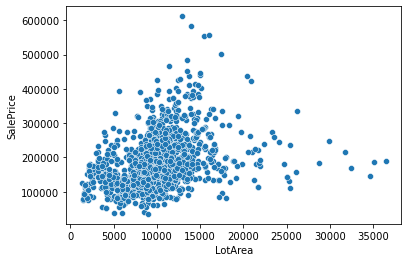

In [711]:
sns.scatterplot(data.LotArea,data['SalePrice'])

In [712]:
# Select Numerical variables
num_var = data.select_dtypes(['int64','float64']).columns

In [713]:
num_var

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'ScreenPorch', 'SalePrice', 'AgeOfHouse', 'AgeOfRemod', 'AgeofGarage'],
      dtype='object')

In [714]:
# Select Categorical variables
cat_var = data.select_dtypes('object').columns

In [715]:
cat_var

Index(['MSSubClass', 'MSZoning', 'Alley', 'LotShape', 'LandContour',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Fence', 'MoSold', 'SaleType', 'SaleCondition',
       'BsmtFinSF2_Cat', 'EnclosedPorch_Cat'],
      dtype='object')

In [716]:
#Display the discriptive statistical details of the Numerical variables
data[num_var].describe()

LotFrontage       LotArea   MasVnrArea   BsmtFinSF1    BsmtUnfSF  \
count  1427.000000   1427.000000  1427.000000  1427.000000  1427.000000   
mean     69.312544   9705.493343   100.004905   430.079888   568.685354   
std      19.863606   4097.785097   169.243086   425.704323   442.976158   
min      21.000000   1300.000000     0.000000     0.000000     0.000000   
25%      60.000000   7500.000000     0.000000     0.000000   223.500000   
50%      69.000000   9400.000000     0.000000   375.000000   481.000000   
75%      79.000000  11427.000000   163.500000   699.500000   807.000000   
max     182.000000  36500.000000  1129.000000  2188.000000  2336.000000   

       TotalBsmtSF     1stFlrSF    2ndFlrSF    GrLivArea  BsmtFullBath  ...  \
count  1427.000000  1427.000000  1427.00000  1427.000000   1427.000000  ...   
mean   1044.279608  1150.032936   339.20953  1494.821303      0.416258  ...   
std     409.633383   365.112993   426.09703   485.390550      0.512633  ...   
min       0.000000   334.000000     0.00000   334.000000      0.000000  ...   
25%     793.000000   879.500000     0.00000  1125.000000      0.000000  ...   
50%     985.000000  1080.000000     0.00000  1456.000000      0.000000  ...   
75%    1276.000000  1372.000000   726.00000  1763.000000      1.000000  ...   
max    3206.000000  3228.000000  1818.00000  3493.000000      3.000000  ...   

        Fireplaces   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1427.000000  1427.000000  1427.000000  1427.000000  1427.000000   
mean      0.594954     1.756833   469.377715    92.163980    44.646811   
std       0.629947     0.747422   211.922806   121.365396    61.193941   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     1.000000   323.000000     0.000000     0.000000   
50%       1.000000     2.000000   475.000000     0.000000    24.000000   
75%       1.000000     2.000000   576.000000   168.000000    66.000000   
max       3.000000     4.000000  1390.000000   736.000000   418.000000   

       ScreenPorch      SalePrice   AgeOfHouse   AgeOfRemod  AgeofGarage  
count  1427.000000    1427.000000  1427.000000  1427.000000  1427.000000  
mean     14.068676  178021.003504    36.597758    23.117730    33.797477  
std      52.152633   74003.357477    30.153919    20.667715    30.045903  
min       0.000000   35311.000000     0.000000     0.000000     0.000000  
25%       0.000000  129500.000000     8.000000     4.000000     7.000000  
50%       0.000000  161000.000000    35.000000    15.000000    30.000000  
75%       0.000000  210000.000000    54.500000    41.000000    50.000000  
max     396.000000  611657.000000   136.000000    60.000000   110.000000  

[8 rows x 25 columns]

**Observation:**

    1. The variable ScreenPorch has more than 75% of its value is 0
    
**Decision**

    1. Convert ScreenPorch to categorical variable 

In [717]:
data['ScreenPorch'].value_counts().sort_index()

0      1317
40        1
53        1
60        1
63        1
80        1
90        3
95        1
99        1
100       2
116       1
119       1
120       5
122       1
126       3
128       1
130       1
140       1
142       2
143       1
144       3
145       1
147       3
152       1
153       1
154       1
155       1
156       1
160       3
161       1
163       1
165       1
168       3
170       2
176       2
178       1
180       4
182       1
184       2
185       1
189       4
190       1
192       6
197       1
198       1
200       2
204       1
216       2
220       1
222       1
224       5
225       1
233       1
234       1
252       1
259       2
260       1
263       1
265       1
266       1
271       1
273       1
276       1
287       1
288       2
291       1
312       1
322       1
374       1
385       1
396       1
Name: ScreenPorch, dtype: int64

In [718]:
def make_cat(e):
    if(e == 0):
        return('No Screen Porch')
    elif((e>0) and (e<=100)):
        return ('1-100')
    elif((e>100) and (e<=200)):
        return ('100-200')
    elif((e>200) and (e<=300)):
        return ('200-300')
    elif((e>300) and (e<=400)):
        return ('300-400')
data['ScreenPorch'] = data['ScreenPorch'].apply(make_cat)

# 6. Data Preparation

In [719]:
# Binary Categorical variables CentralAir,
data['CentralAir'].value_counts()

Y    1333
N      94
Name: CentralAir, dtype: int64

In [720]:
#Convert CentralAir variable to binary variable
data['CentralAir'] = data['CentralAir'].apply(lambda x: 1 if (x == 'Y') else 0)
data['CentralAir'].value_counts()

1    1333
0      94
Name: CentralAir, dtype: int64

In [721]:
# Select Numerical variables
num_var = data.select_dtypes(['int64','float64']).columns

# Select Categorical variables
cat_var = data.select_dtypes('object').columns

In [722]:
num_var

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF',
       'TotalBsmtSF', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'SalePrice', 'AgeOfHouse', 'AgeOfRemod', 'AgeofGarage'],
      dtype='object')

In [723]:
cat_var

Index(['MSSubClass', 'MSZoning', 'Alley', 'LotShape', 'LandContour',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'HeatingQC', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'ScreenPorch', 'Fence', 'MoSold', 'SaleType', 'SaleCondition',
       'BsmtFinSF2_Cat', 'EnclosedPorch_Cat'],
      dtype='object')

# 6.1 Create Dummy variables for Categorical Variables

In [724]:
# Create Dummy variables (One hot encoding) for categorical variables
# Convert into dummies
data_dummies = pd.get_dummies(data[cat_var], drop_first=True)
data_dummies.head()

MSSubClass_B  MSSubClass_C  MSSubClass_D  MSSubClass_E  MSSubClass_F  \
0             0             0             0             0             1   
1             0             0             0             0             0   
2             0             0             0             0             1   
3             0             0             0             0             0   
4             0             0             0             0             1   

   MSSubClass_G  MSSubClass_H  MSSubClass_I  MSSubClass_J  MSSubClass_K  ...  \
0             0             0             0             0             0  ...   
1             0             0             0             0             0  ...   
2             0             0             0             0             0  ...   
3             1             0             0             0             0  ...   
4             0             0             0             0             0  ...   

   SaleCondition_Partial  BsmtFinSF2_Cat_1 - 200  BsmtFinSF2_Cat_200 - 400  \
0                      0                       0                         0   
1                      0                       0                         0   
2                      0                       0                         0   
3                      0                       0                         0   
4                      0                       0                         0   

   BsmtFinSF2_Cat_400 - 600  BsmtFinSF2_Cat_600 - 800  \
0                         0                         0   
1                         0                         0   
2                         0                         0   
3                         0                         0   
4                         0                         0   

   BsmtFinSF2_Cat_800 - 1000  BsmtFinSF2_Cat_>1000  EnclosedPorch_Cat_1 - 200  \
0                          0                     0                          0   
1                          0                     0                          0   
2                          0                     0                          0   
3                          0                     0                          0   
4                          0                     0                          0   

   EnclosedPorch_Cat_200 - 400  EnclosedPorch_Cat_400 - 600  
0                            0                            0  
1                            0                            0  
2                            0                            0  
3                            1                            0  
4                            0                            0  

[5 rows x 249 columns]

In [725]:
#Concat dummy variables with numerical variables
data = pd.concat([data[num_var],data_dummies],axis =1) 

In [726]:
data.shape

(1427, 274)

In [727]:
data.columns

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF',
       'TotalBsmtSF', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       ...
       'SaleCondition_Partial', 'BsmtFinSF2_Cat_1 - 200',
       'BsmtFinSF2_Cat_200 - 400', 'BsmtFinSF2_Cat_400 - 600',
       'BsmtFinSF2_Cat_600 - 800', 'BsmtFinSF2_Cat_800 - 1000',
       'BsmtFinSF2_Cat_>1000', 'EnclosedPorch_Cat_1 - 200',
       'EnclosedPorch_Cat_200 - 400', 'EnclosedPorch_Cat_400 - 600'],
      dtype='object', length=274)

# 6.2 Divide the data into Training and testing set

In [728]:
# Split the X and y into X_train ,y_train and X_test y_test sets
from sklearn.model_selection import train_test_split
np.random.seed(0)

train,test = train_test_split(data, train_size=0.7, test_size=0.3, random_state=100)

In [729]:
train.select_dtypes(['int64','float64']).columns

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF',
       'TotalBsmtSF', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'SalePrice', 'AgeOfHouse', 'AgeOfRemod', 'AgeofGarage'],
      dtype='object')

In [730]:
num_var

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF',
       'TotalBsmtSF', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'SalePrice', 'AgeOfHouse', 'AgeOfRemod', 'AgeofGarage'],
      dtype='object')

# 6. 3 Perform Scaling
We need to scale the variables for better interpretability and to converge fast to the solution. But we only need to scale the numeric columns (Continuous variables) and not the dummy variables and binary categorical variables.

In [731]:
# Import MinMaxScaler for scaling the features (Normalization)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()


# Apply scaler to all the continuous variables of train set
# Don't apply for dummy variables and binary categorical variables
scale_num_var = num_var.drop('CentralAir')
train[scale_num_var] = scaler.fit_transform(train[scale_num_var])


In [732]:
# Apply scaler to all the continuous independent variables of test set
test[scale_num_var] =scaler.fit_transform(test[scale_num_var])

In [733]:
train.head()

LotFrontage   LotArea  MasVnrArea  BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  \
732      0.335404  0.287045    0.192932    0.115174   0.418486     0.359638   
1315     0.397516  0.277699    0.000000    0.228519   0.081746     0.296943   
148      0.260870  0.176136    0.114613    0.310786   0.185787     0.336868   
1107     0.913043  0.623778    0.000000    0.000000   0.403158     0.270742   
1295     0.304348  0.201705    0.160458    0.464351   0.016721     0.328135   

      CentralAir  1stFlrSF  2ndFlrSF  GrLivArea  ...  SaleCondition_Partial  \
732            1  0.244905  0.570130   0.522750  ...                      0   
1315           1  0.222707  0.662338   0.550051  ...                      0   
148            1  0.218341  0.000000   0.202224  ...                      0   
1107           1  0.148108  0.736364   0.519380  ...                      1   
1295           1  0.208151  0.000000   0.192787  ...                      0   

      BsmtFinSF2_Cat_1 - 200  BsmtFinSF2_Cat_200 - 400  \
732                        0                         0   
1315                       0                         1   
148                        0                         0   
1107                       0                         0   
1295                       0                         0   

      BsmtFinSF2_Cat_400 - 600  BsmtFinSF2_Cat_600 - 800  \
732                          0                         0   
1315                         0                         0   
148                          0                         0   
1107                         0                         0   
1295                         0                         0   

      BsmtFinSF2_Cat_800 - 1000  BsmtFinSF2_Cat_>1000  \
732                           0                     0   
1315                          0                     0   
148                           0                     0   
1107                          0                     0   
1295                          0                     0   

      EnclosedPorch_Cat_1 - 200  EnclosedPorch_Cat_200 - 400  \
732                           0                            0   
1315                          0                            0   
148                           0                            0   
1107                          0                            0   
1295                          0                            0   

      EnclosedPorch_Cat_400 - 600  
732                             0  
1315                            0  
148                             0  
1107                            0  
1295                            0  

[5 rows x 274 columns]

## 6.4 Split the training and test data set into indpendent and dependent variables

In [734]:
# Split the train dataset into independent and dependent variables

y_train = train.pop('SalePrice')
X_train = train

In [735]:
#Split the test dataset into independent and dependent variables
y_test = test.pop('SalePrice')
X_test = test

# 7. Model Building and Evaluation

## 7.1 Model 1: Include all the independent variables and create Linear Regression model

Let's now try predicting house prices, a dataset using linear regression.

In [736]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [737]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

7991002321.749636
[ 3.21181085e-02  5.73937397e-02  2.96109659e-02  3.15838363e-02
 -3.95906004e-02  1.59228179e-01  7.63524419e-03  1.30590682e-01
  9.43030464e-02  1.11752170e-01  7.20734515e-03  2.74878276e-03
  1.50846422e-02  1.07108845e-02 -4.47122969e-02  3.25274487e-02
  3.31726090e-02  1.82568870e-03  5.27769724e-02  1.71624595e-02
  1.67000635e-02 -1.00375570e-01 -1.00446369e-02  1.73990517e-03
 -1.89895699e-03  1.80352335e-02  1.79694672e-02 -2.24046914e-02
  1.42208647e-02  1.58284150e-02 -3.44345023e-02  1.77672027e-02
 -6.94837088e-03 -1.06929923e+10 -2.30186838e-02 -2.25560027e-02
 -8.90254624e-03  3.72773788e+09  6.22049869e-02  4.09062943e-02
  4.15115506e-02  3.52917845e-02 -2.31667733e-03  2.51088791e-03
  3.36199129e-05 -3.75457653e-03  1.88725045e-03  7.12968787e-03
 -1.04218034e-02  6.14680838e-03  1.34624627e-02 -9.65840726e-03
 -2.21703589e-02 -1.12746765e-03  6.60132619e-03 -6.42750357e-02
  6.59133915e-04  6.63852889e-03  1.46710420e-03 -3.30414298e-03
 -1.538

In [738]:
#Import metrics r2_score and mean_squared_error for model evaluation

from sklearn.metrics import r2_score, mean_squared_error

# Predict the target variable of train and test set
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

# metric_lr stores list of metrics such as r2_score, rss, mse of both train and test data set
metric_lr = []

# calculate r2_score of traing dataset
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric_lr.append(r2_train_lr)

#Calculate the r2_score of test dataset
r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric_lr.append(r2_test_lr)

#Calculate the rss (residual sum of square) of training dataset
rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric_lr.append(rss1_lr)

# Calculate the rss of testing dataset
rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric_lr.append(rss2_lr)

#Calculate the mse(mean square error) of training dataset
mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric_lr.append(mse_train_lr**0.5)

#Calculate the mse of testing dataset
mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric_lr.append(mse_test_lr**0.5)

0.9502477385839122
-3.537090451686506e+20
0.8022999653812031
3.224306339895073e+21
0.0008039077809430892
7.515865594161009e+18


**Observation:**

   1. Linear regression with all the features in the model is not giving good result. 
   2. We will build linear regression model using  RFE by feature elimination 

# 7.2 Build a model using RFE 

In [739]:
#Import RFE
from sklearn.feature_selection import RFE

# running RFE with number of features=50

rfe_lm = LinearRegression()
rfe_lm.fit(X_train, y_train)

rfe_50 = RFE(rfe_lm, n_features_to_select=100)             
rfe_50 = rfe_50.fit(X_train, y_train)

In [740]:
# predict SalePrice for Train set
y_pred_train =rfe_50.predict(X_train)

# predict SalePrice for Test set
y_pred_test = rfe_50.predict(X_test)

# evaluate the model on train set
r2_train = r2_score(y_train , y_pred_train)
print(r2_train)
# evaluate the model on test set
r2_test = r2_score(y_test, y_pred_test)
print(r2_test)

0.9377583310890258
-1.235890469789992e+21


In [741]:
#Import RFE
from sklearn.feature_selection import RFE

# running RFE with number of features=40

rfe_lm = LinearRegression()
rfe_lm.fit(X_train, y_train)

rfe_40 = RFE(rfe_lm, n_features_to_select=40)             
rfe_40 = rfe_40.fit(X_train, y_train)

In [742]:
# tuples of (feature name, whether selected, ranking)
# note that the 'rank' is > 1 for non-selected features
list(zip(X_train.columns,rfe_40.support_,rfe_40.ranking_))

[('LotFrontage', True, 1),
 ('LotArea', True, 1),
 ('MasVnrArea', False, 56),
 ('BsmtFinSF1', False, 129),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('CentralAir', False, 128),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('GrLivArea', False, 68),
 ('BsmtFullBath', False, 230),
 ('BsmtHalfBath', False, 220),
 ('FullBath', False, 99),
 ('HalfBath', False, 100),
 ('BedroomAbvGr', True, 1),
 ('TotRmsAbvGrd', True, 1),
 ('Fireplaces', False, 89),
 ('GarageCars', False, 188),
 ('GarageArea', True, 1),
 ('WoodDeckSF', False, 73),
 ('OpenPorchSF', False, 63),
 ('AgeOfHouse', True, 1),
 ('AgeOfRemod', False, 106),
 ('AgeofGarage', False, 212),
 ('MSSubClass_B', False, 227),
 ('MSSubClass_C', False, 125),
 ('MSSubClass_D', False, 155),
 ('MSSubClass_E', False, 82),
 ('MSSubClass_F', False, 54),
 ('MSSubClass_G', False, 53),
 ('MSSubClass_H', False, 69),
 ('MSSubClass_I', False, 64),
 ('MSSubClass_J', False, 156),
 ('MSSubClass_K', True, 1),
 ('MSSubClass_L', False, 90),
 ('MSSubC

In [743]:
# predict SalePrice for Train set
y_pred_train =rfe_40.predict(X_train)

# predict SalePrice for Test set
y_pred_test = rfe_40.predict(X_test)

# evaluate the model on train set
r2_train = r2_score(y_train , y_pred_train)
print(r2_train)
# evaluate the model on test set
r2_test = r2_score(y_test, y_pred_test)
print(r2_test)

0.9124776436429421
0.8596062225604454


In [744]:
X_train.columns[rfe_40.support_ == True]

Index(['LotFrontage', 'LotArea', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'BedroomAbvGr', 'TotRmsAbvGrd', 'GarageArea', 'AgeOfHouse',
       'MSSubClass_K', 'MSSubClass_P', 'LandSlope_Sev', 'Neighborhood_Crawfor',
       'Condition1_RRAe', 'BldgType_2fmCon', 'BldgType_Duplex',
       'OverallQual_Excellent', 'OverallQual_Very Excellent',
       'OverallQual_Very Good', 'OverallQual_Very Poor', 'OverallCond_Fair',
       'OverallCond_Poor', 'OverallCond_Very Poor', 'Exterior1st_CBlock',
       'ExterQual_Fa', 'ExterQual_Gd', 'ExterQual_TA', 'Foundation_Wood',
       'BsmtExposure_Gd', 'BsmtExposure_No Basement',
       'BsmtFinType1_No Basement', 'Functional_Sev', 'GarageQual_Gd',
       'GarageQual_Po', 'SaleType_Con', 'SaleType_New',
       'SaleCondition_Partial', 'BsmtFinSF2_Cat_400 - 600',
       'BsmtFinSF2_Cat_800 - 1000'],
      dtype='object')

## 7.2.1 Model 2: (Build the Linear Regression model by considering top 30 features)

In [745]:
#Import RFE
from sklearn.feature_selection import RFE

# running RFE with number of features=30

rfe_lm = LinearRegression()
rfe_lm.fit(X_train, y_train)

rfe_30 = RFE(rfe_lm, n_features_to_select=30)             
rfe_30 = rfe_30.fit(X_train, y_train)

In [746]:
# tuples of (feature name, whether selected, ranking)
# note that the 'rank' is > 1 for non-selected features
list(zip(X_train.columns,rfe_30.support_,rfe_30.ranking_))

[('LotFrontage', False, 2),
 ('LotArea', True, 1),
 ('MasVnrArea', False, 66),
 ('BsmtFinSF1', False, 139),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('CentralAir', False, 138),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('GrLivArea', False, 78),
 ('BsmtFullBath', False, 240),
 ('BsmtHalfBath', False, 230),
 ('FullBath', False, 109),
 ('HalfBath', False, 110),
 ('BedroomAbvGr', True, 1),
 ('TotRmsAbvGrd', True, 1),
 ('Fireplaces', False, 99),
 ('GarageCars', False, 198),
 ('GarageArea', True, 1),
 ('WoodDeckSF', False, 83),
 ('OpenPorchSF', False, 73),
 ('AgeOfHouse', True, 1),
 ('AgeOfRemod', False, 116),
 ('AgeofGarage', False, 222),
 ('MSSubClass_B', False, 237),
 ('MSSubClass_C', False, 135),
 ('MSSubClass_D', False, 165),
 ('MSSubClass_E', False, 92),
 ('MSSubClass_F', False, 64),
 ('MSSubClass_G', False, 63),
 ('MSSubClass_H', False, 79),
 ('MSSubClass_I', False, 74),
 ('MSSubClass_J', False, 166),
 ('MSSubClass_K', True, 1),
 ('MSSubClass_L', False, 100),
 ('MSS

In [747]:
# predict SalePrice for Train set
y_pred_train =rfe_30.predict(X_train)

# predict SalePrice for Test set
y_pred_test = rfe_30.predict(X_test)

# evaluate the model on train set
r2_train = r2_score(y_train , y_pred_train)
print(r2_train)
# evaluate the model on test set
r2_test = r2_score(y_test, y_pred_test)
print(r2_test)

0.9107976200488745
0.8605305834650291


In [748]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = rfe_30.predict(X_train)
y_pred_test = rfe_30.predict(X_test)

metric_rfe_30 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric_rfe_30.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric_rfe_30.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric_rfe_30.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric_rfe_30.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric_rfe_30.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric_rfe_30.append(mse_test_lr**0.5)

0.9107976200488745
0.8605305834650291
1.438468610465355
1.271361674510635
0.0014413513130915382
0.002963547026831317


In [749]:
#Import RFE
from sklearn.feature_selection import RFE

# running RFE with number of features=25

rfe_lm = LinearRegression()
rfe_lm.fit(X_train, y_train)

rfe_25 = RFE(rfe_lm, n_features_to_select=25)             
rfe_25 = rfe_25.fit(X_train, y_train)

In [750]:
# predict SalePrice for Train set
y_pred_train =rfe_25.predict(X_train)

# predict SalePrice for Test set
y_pred_test = rfe_25.predict(X_test)

# evaluate the model on train set
r2_train = r2_score(y_train , y_pred_train)
print(r2_train)
# evaluate the model on test set
r2_test = r2_score(y_test, y_pred_test)
print(r2_test)

0.9077603727787023
0.8603823249864437


**Observation:**

The Linear regression model with top 30 features gives good accuracy value for training and test dataset. 

We will apply regularization( ridge and Lasso regression) for the data set with to top 30 features which we got it by applying RFE method and check the accuracy of the models.

In [751]:
X_train.columns[rfe_25.support_ == True]

Index(['LotArea', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'BedroomAbvGr', 'GarageArea', 'AgeOfHouse', 'MSSubClass_K',
       'LandSlope_Sev', 'Neighborhood_Crawfor', 'OverallQual_Excellent',
       'OverallQual_Very Excellent', 'OverallQual_Very Good',
       'OverallCond_Fair', 'OverallCond_Poor', 'ExterQual_Fa', 'ExterQual_Gd',
       'ExterQual_TA', 'Foundation_Wood', 'BsmtExposure_Gd', 'Functional_Sev',
       'SaleType_Con', 'SaleType_New', 'BsmtFinSF2_Cat_800 - 1000'],
      dtype='object')

# Evaluate the rfe model with top 30 significant features

##  Error terms Normality check

In [752]:
# Predict the target variable by rfe model
y_test_pred = rfe_30.predict(X_test)

Text(0.5, 0, 'Errors')

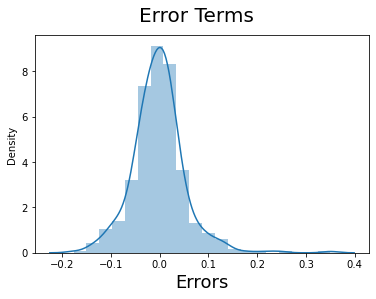

In [753]:

# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_test - y_test_pred), bins = 20)
# Plot heading
fig.suptitle('Error Terms', fontsize = 20)    
# Give the X-label
plt.xlabel('Errors', fontsize = 18)  

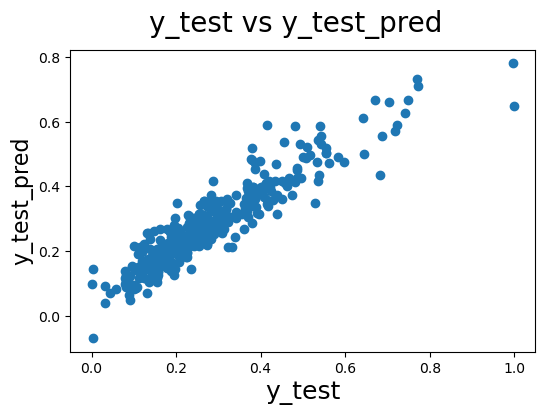

In [754]:
# Plotting y_test and y_pred to understand the spread for rfe linear regression.
fig = plt.figure(dpi=100)
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_test_pred', fontsize=16)  
plt.show()

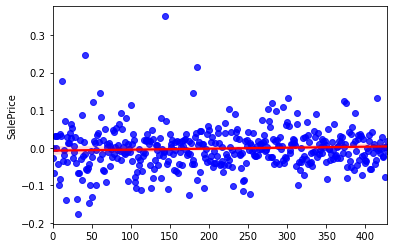

In [755]:
# Scatter plot to see the distribution of residuals
res = y_test - y_test_pred
c = [i for i in range(0,len(X_test),1)]

sns.regplot(x= c, y= res, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.plot()
plt.show()

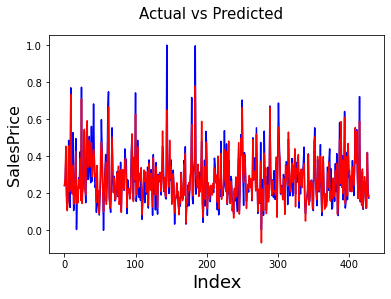

In [757]:
# Plot Actual vs predicted value of target variable
c = [i for i in range(0,len(X_test),1)]
plt.plot(c,y_test,color='blue')
plt.plot(c,y_test_pred,color = 'red')
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('SalesPrice', fontsize=16)  
plt.show()

**Observation**

The Linear Regression model with top 30 features is not so bad model. We can use use this model for the top features and apply regularization by creating ridge and lasso regression.   

## 7.2.2 Model 3: (Build the Ridge Regression model by considering top 30 features)

## Ridge regression for the top 30 features selected by RFE_30 model

In [778]:
# Ridge Regression for the top 30 features selected by RFE_30 model
top_30 =X_train.columns[rfe_30.support_ == True]

# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting

# hyper-parameter tuning
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

# cross validation
folds = 5

ridge_30 = Ridge()
model_cv = GridSearchCV(estimator = ridge_30, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train[top_30], y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.9s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [779]:
alpha = model_cv.best_params_
print("best alpha: ",alpha)

best alpha:  {'alpha': 0.7}


In [780]:
alpha['alpha']

0.7

In [781]:
#Fitting Ridge model for alpha = 4 and printing coefficients which have been penalised
alpha = model_cv.best_params_['alpha']
ridge_30 = Ridge(alpha=alpha)

ridge_30.fit(X_train[top_30], y_train)
print(ridge.coef_)

[ 2.58998821e-02  3.68843770e-02  3.46167065e-02  6.83829187e-02
  1.76750252e-02  6.11458556e-02  1.04356521e-02  7.75943076e-02
  5.02684492e-02  9.55705401e-02  1.27446278e-02 -1.65087393e-04
  2.86732194e-02  1.55745200e-02 -1.15662380e-02  3.80200815e-02
  2.79367473e-02  1.79817409e-02  3.86459717e-02  2.08004024e-02
  2.15657763e-02 -4.05079198e-02 -1.56131178e-02  8.25780268e-04
 -7.70622380e-03  1.16368752e-02  5.01630108e-03 -1.78736633e-03
  1.37624030e-02  1.17813220e-02 -9.73521814e-03  9.04825794e-03
 -5.46936481e-03 -1.34609426e-02 -1.31394461e-02 -1.00367287e-02
 -2.92123436e-03 -8.13918642e-03  2.09752074e-02  7.55274171e-03
  9.61981812e-03  1.51525819e-03 -3.45441346e-04  2.72865458e-03
  1.30725758e-03  2.53284453e-03  7.11649013e-04  6.00783214e-03
 -9.06372797e-03  8.50215125e-03  1.32849943e-02 -1.08418832e-02
 -9.70644075e-03 -1.88848132e-03  7.96006861e-03 -1.22756206e-02
  1.38122009e-03  6.90211370e-03  1.58686278e-03  4.03028334e-03
 -8.49718753e-03  3.55233

In [782]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge_30.predict(X_train[top_30])
y_pred_test = ridge_30.predict(X_test[top_30])

metric_ridge_30 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric_ridge_30.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric_ridge_30.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric_ridge_30.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric_ridge_30.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric_ridge_30.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric_ridge_30.append(mse_test_lr**0.5)

0.9097956717475166
0.8584500749299321
1.454625928034707
1.2903269708510796
0.0014575410100548165
0.0030077551768090435


# Evaluate the ridge model of top 30 featueres

In [783]:
y_test_pred = ridge_30.predict(X_test[top_30])

Text(0.5, 0, 'Errors')

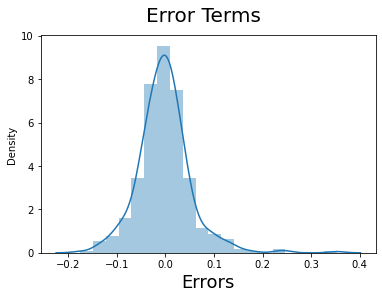

In [784]:

# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_test - y_test_pred), bins = 20)
# Plot heading
fig.suptitle('Error Terms', fontsize = 20)    
# Give the X-label
plt.xlabel('Errors', fontsize = 18)  

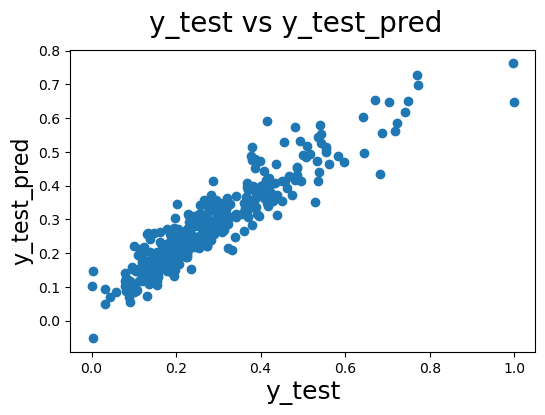

In [785]:
# Plotting y_test and y_pred to understand the spread for ridge regression.
fig = plt.figure(dpi=100)
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_test_pred', fontsize=16)  
plt.show()

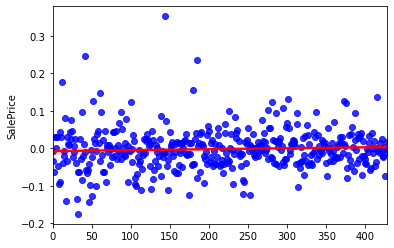

In [786]:
# Scatter plot to see the distribution of residuals
res = y_test - y_test_pred
c = [i for i in range(0,len(X_test),1)]

sns.regplot(x= c, y= res, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.plot()
plt.show()

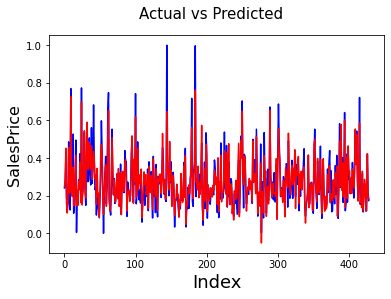

In [787]:
# Error Terms
c = [i for i in range(0,len(X_test[top_30]),1)]
plt.plot(c,y_test,color='blue')
plt.plot(c,y_test_pred,color = 'red')
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('SalesPrice', fontsize=16)  
plt.show()

 ##  7.2.3 Model 4 : (Build the Lasso Regression model by considering top 10 features)

# Lasso regression for the top 30 features selected by RFE_30 model

In [799]:
# create Lasso object
lasso_30 = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso_30, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train[top_30], y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.1s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [800]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.0001}


In [801]:
alpha = model_cv.best_params_['alpha']
alpha

0.0001

In [802]:
lasso_30 = Lasso(alpha=alpha)
        
lasso_30.fit(X_train[top_30], y_train) 

Lasso(alpha=0.0001)

In [803]:
lasso_30.coef_

array([ 0.0690164 , -0.06854349,  0.1919873 ,  0.26910798,  0.15619323,
       -0.03922169,  0.03846562,  0.06371164, -0.09296841, -0.05555952,
       -0.02880791, -0.01891034,  0.05504598, -0.02562898,  0.11999844,
        0.09125636,  0.05635879, -0.        , -0.04145633, -0.02886575,
       -0.09181849, -0.05486325, -0.07751049, -0.02141085,  0.0463359 ,
       -0.08100154,  0.02524941,  0.01380103,  0.04601754, -0.02840653])

In [805]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso_30.predict(X_train[top_30])
y_pred_test = lasso_30.predict(X_test[top_30])

metric_lasso_30 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric_lasso_30.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric_lasso_30.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric_lasso_30.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric_lasso_30.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric_lasso_30.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric_lasso_30.append(mse_test_lr**0.5)

0.9081839040229057
0.8605024580767322
1.4806171323106954
1.2716180571760949
0.0014835843009125204
0.0029641446554221325


# Compare the Linear Regression Model model, Ridge regression model and Lasso regression model with to 30 features

In [806]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)']
            
        }

lr_rfe_metric = pd.DataFrame(lr_table ,columns = ['Metric'] )
rfe_metric = pd.Series(metric_rfe_30,name ="Linear Regression by RFE_30")
rg_metric = pd.Series(metric_ridge_30, name = 'Ridge Regression')
ls_metric = pd.Series(metric_lasso_30, name = 'Lasso Regression')

final_metric = pd.concat([lr_rfe_metric,rfe_metric, rg_metric, ls_metric], axis = 1)

final_metric

Metric  Linear Regression by RFE_30  Ridge Regression  \
0  R2 Score (Train)                     0.910798          0.908147   
1   R2 Score (Test)                     0.860531          0.855779   
2       RSS (Train)                     1.438469          1.481205   
3        RSS (Test)                     1.271362          1.314671   
4       MSE (Train)                     0.037965          0.038525   
5        MSE (Test)                     0.054438          0.055358   

   Lasso Regression  
0          0.908184  
1          0.860502  
2          1.480617  
3          1.271618  
4          0.038517  
5          0.054444

In [807]:
#Fitting Ridge model for alpha = 0.7 and printing coefficients which have been penalised
alpha = 0.7 * 2 # Double the alpha value and check the result
ridge_30 = Ridge(alpha=alpha)

ridge_30.fit(X_train[top_30], y_train)

Ridge(alpha=1.4)

In [808]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge_30.predict(X_train[top_30])
y_pred_test = ridge_30.predict(X_test[top_30])

metric_ridge_30 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric_ridge_30.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric_ridge_30.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric_ridge_30.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric_ridge_30.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric_ridge_30.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric_ridge_30.append(mse_test_lr**0.5)

0.9081474532179643
0.855779492661301
1.4812049343263265
1.3146712036536436
0.0014841732808881028
0.0030645016402182836


In [809]:
alpha = 0.0001 * 2 # Double the alpha and check the result
lasso_30 = Lasso(alpha=alpha)
        
lasso_30.fit(X_train[top_30], y_train) 

Lasso(alpha=0.0002)

In [810]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso_30.predict(X_train[top_30])
y_pred_test = lasso_30.predict(X_test[top_30])

metric_lasso_30 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric_lasso_30.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric_lasso_30.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric_lasso_30.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric_lasso_30.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric_lasso_30.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric_lasso_30.append(mse_test_lr**0.5)

0.9025230161530358
0.8566808050750909
1.5719040409406404
1.306455108052744
0.0015750541492391187
0.0030453499022208485


# 7.3 Model 5: Build the Ridge Regression model by considering all the features

# Ridge Regression

In [811]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting

# hyper-parameter tuning
params = {'alpha': [0.00001,0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

# cross validation
folds = 5

ridge= Ridge()
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 29 candidates, totalling 145 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 145 out of 145 | elapsed:    2.8s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.05, 0.1, 0.2,
                                   0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0,
                                   3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20,
                                   50, 100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [812]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 4.0}


In [813]:
#Fitting Ridge model for alpha = 4 and printing coefficients which have been penalised
alpha = model_cv.best_params_['alpha']
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 2.58998821e-02  3.68843770e-02  3.46167065e-02  6.83829187e-02
  1.76750252e-02  6.11458556e-02  1.04356521e-02  7.75943076e-02
  5.02684492e-02  9.55705401e-02  1.27446278e-02 -1.65087393e-04
  2.86732194e-02  1.55745200e-02 -1.15662380e-02  3.80200815e-02
  2.79367473e-02  1.79817409e-02  3.86459717e-02  2.08004024e-02
  2.15657763e-02 -4.05079198e-02 -1.56131178e-02  8.25780268e-04
 -7.70622380e-03  1.16368752e-02  5.01630108e-03 -1.78736633e-03
  1.37624030e-02  1.17813220e-02 -9.73521814e-03  9.04825794e-03
 -5.46936481e-03 -1.34609426e-02 -1.31394461e-02 -1.00367287e-02
 -2.92123436e-03 -8.13918642e-03  2.09752074e-02  7.55274171e-03
  9.61981812e-03  1.51525819e-03 -3.45441346e-04  2.72865458e-03
  1.30725758e-03  2.53284453e-03  7.11649013e-04  6.00783214e-03
 -9.06372797e-03  8.50215125e-03  1.32849943e-02 -1.08418832e-02
 -9.70644075e-03 -1.88848132e-03  7.96006861e-03 -1.22756206e-02
  1.38122009e-03  6.90211370e-03  1.58686278e-03  4.03028334e-03
 -8.49718753e-03  3.55233

In [814]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.9442150086301835
0.8779145245112634
0.8995831620695371
1.1128948439521742
0.000901385933937412
0.0025941604754129936


# Evaluation of ridge model

In [815]:
y_test_pred = ridge.predict(X_test)

# Error terms normality test

Text(0.5, 0, 'Errors')

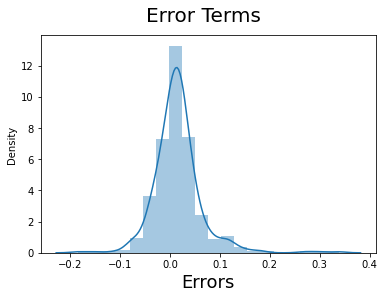

In [816]:

# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_test - y_test_pred), bins = 20)
# Plot heading
fig.suptitle('Error Terms', fontsize = 20)    
# Give the X-label
plt.xlabel('Errors', fontsize = 18)  

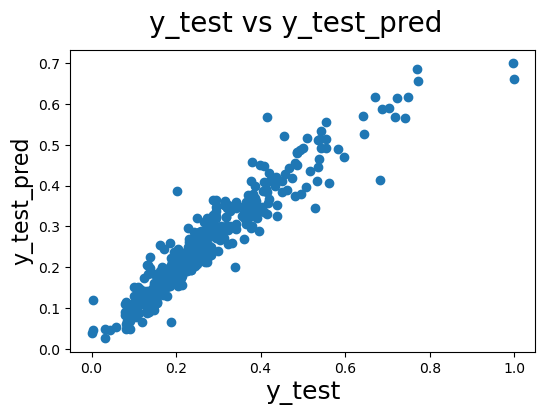

In [817]:
# Plotting y_test and y_pred to understand the spread for ridge regression.
fig = plt.figure(dpi=100)
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_test_pred', fontsize=16)  
plt.show()

### Looking for patterns in the residuals

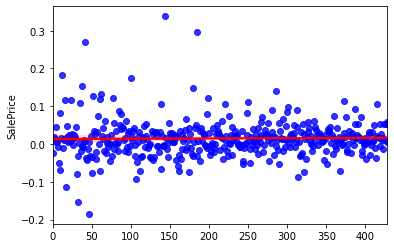

In [818]:
# Scatter plot to see the distribution of residuals
res = y_test - y_test_pred
c = [i for i in range(0,len(X_test),1)]

sns.regplot(x= c, y= res, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.plot()
plt.show()

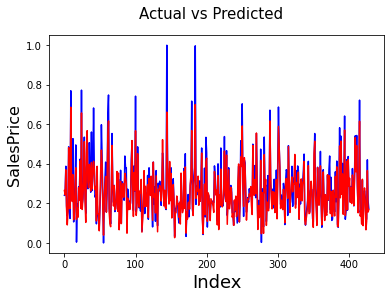

In [820]:
# Plot the actual and predicted value of target variable
c = [i for i in range(0,len(X_test),1)]
plt.plot(c,y_test,color='blue')
plt.plot(c,y_test_pred,color = 'red')
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('SalesPrice', fontsize=16)  
plt.show()

# 7.4 Model 6: Build the Lasso Regression model by considering all the features

# Lasso Regression

In [821]:
# create Lasso object
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 29 candidates, totalling 145 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 145 out of 145 | elapsed:    3.4s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.05, 0.1, 0.2,
                                   0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0,
                                   3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20,
                                   50, 100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [822]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.0001}


In [823]:
#Fitting Lasso model for alpha = 0.0001 and printing coefficients which have been penalised

alpha =0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.0001)

In [824]:
lasso.coef_

array([ 2.21815505e-02,  3.64133568e-02,  3.36501669e-02,  6.28100122e-02,
        0.00000000e+00,  6.84554754e-02,  6.41703565e-03,  1.86311947e-02,
        0.00000000e+00,  2.58853672e-01,  8.99768246e-03, -0.00000000e+00,
        7.34427156e-03,  7.48460300e-03, -1.08046219e-03,  0.00000000e+00,
        1.65105373e-02,  0.00000000e+00,  4.62617246e-02,  1.60686326e-02,
        1.65710927e-02, -7.55928635e-02, -1.30581804e-02,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  5.66835489e-03, -0.00000000e+00,
        6.97888469e-03,  8.32685717e-03, -6.07362087e-03,  5.73700909e-03,
       -0.00000000e+00, -2.55127656e-02, -7.52279219e-03, -1.32049701e-02,
       -0.00000000e+00, -6.80343246e-03,  1.79398651e-02,  0.00000000e+00,
        6.21633811e-03, -1.22181305e-03, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  1.67049428e-04,  0.00000000e+00,
       -6.16001448e-03,  4.68963861e-03,  1.47870879e-02, -4.42519091e-03,
       -0.00000000e+00, -

In [825]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.9421057030439967
0.8786740611510512
0.9335976118776184
1.105971134093743
0.0009354685489755695
0.0025780212915938066


# Evaluation of lasso model

In [826]:
y_test_pred = lasso.predict(X_test)

# Error terms normality test

Text(0.5, 0, 'Errors')

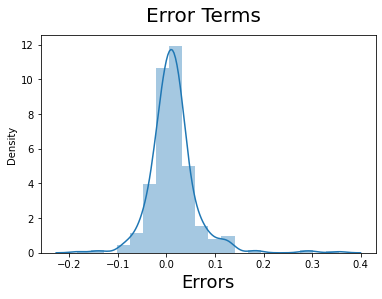

In [827]:

# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_test - y_test_pred), bins = 20)
# Plot heading
fig.suptitle('Error Terms', fontsize = 20)    
# Give the X-label
plt.xlabel('Errors', fontsize = 18)  

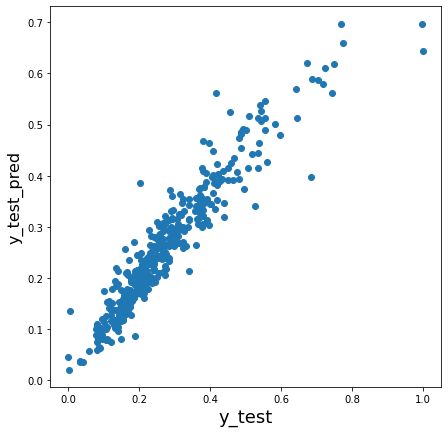

In [828]:
# Plotting y_test and y_pred to understand the spread for ridge regression.
plt.figure(figsize=(7,7))
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_test_pred', fontsize=16)  
plt.show()

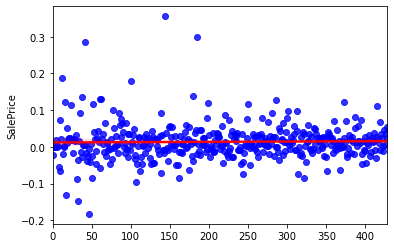

In [829]:
# Scatter plot to see the distribution of residuals
res = y_test - y_test_pred
c = [i for i in range(0,len(X_test),1)]

sns.regplot(x= c, y= res, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.show()

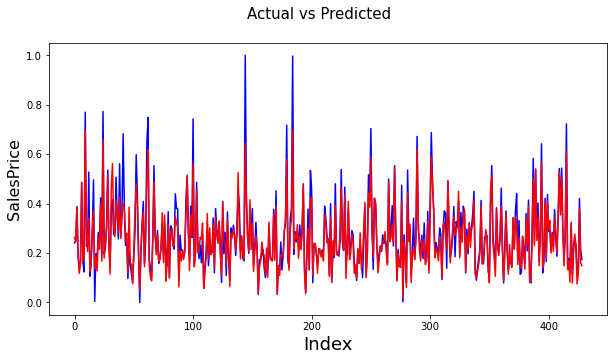

In [830]:
# Error Terms
plt.figure(figsize=(10,5))
c = [i for i in range(0,len(X_test),1)]
plt.plot(c,y_test,color='blue')
plt.plot(c,y_test_pred,color = 'red')
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('SalesPrice', fontsize=16)  
plt.show()

# Comparing the Ridge and Lasso Regression model with all the independent features

In [831]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)']
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

Metric  Ridge Regression  Lasso Regression
0  R2 Score (Train)          0.944215          0.942106
1   R2 Score (Test)          0.877915          0.878674
2       RSS (Train)          0.899583          0.933598
3        RSS (Test)          1.112895          1.105971
4       MSE (Train)          0.030023          0.030585
5        MSE (Test)          0.050933          0.050774

**Observation**

   1. Both Ridge and Lasso regression gives good result. The Ridge regression gives 87.79% of accuracy for the test set, the Lasso regression gives 87.86% accuracy for test set. 
       * Lasso regression shows little high accuracy compare to Ridge regression
       
   2. Both Ridge and Lasso regression satisfies all the assumption of linear regression.i.e,
    
        * Linearity of the independent variables with the target variable
        * Error terms shows Normal distribution with mean 0 
        * Homocedasticity of error terms
        * Error terms are independent to each other 
        
   3. Error terms should be least
       * RSS and MSE of Lasso regression has least value compare to the Ridge regression
   
   4. Optimal alpha value of Ridge regression is 4 and optimal alpha value of Lasso is 0.0001 
      
 Lasso Regression shows little better result compare to Ridge Regression. Lasso regression also has the advantage of feature selection.

# Lets observe the changes in the coefficients after regularization

In [838]:
# Observe the betas(coefficients) of independent variables
betas = pd.DataFrame(index=X_train.columns)
betas.rows = X_train.columns

betas['LinearRegression'] = lm.coef_ 
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [839]:
pd.set_option('display.max_rows', None)
betas

LinearRegression     Ridge     Lasso
LotFrontage                      3.211811e-02  0.025900  0.022182
LotArea                          5.739374e-02  0.036884  0.036413
MasVnrArea                       2.961097e-02  0.034617  0.033650
BsmtFinSF1                       3.158384e-02  0.068383  0.062810
BsmtUnfSF                       -3.959060e-02  0.017675  0.000000
TotalBsmtSF                      1.592282e-01  0.061146  0.068455
CentralAir                       7.635244e-03  0.010436  0.006417
1stFlrSF                         1.305907e-01  0.077594  0.018631
2ndFlrSF                         9.430305e-02  0.050268  0.000000
GrLivArea                        1.117522e-01  0.095571  0.258854
BsmtFullBath                     7.207345e-03  0.012745  0.008998
BsmtHalfBath                     2.748783e-03 -0.000165 -0.000000
FullBath                         1.508464e-02  0.028673  0.007344
HalfBath                         1.071088e-02  0.015575  0.007485
BedroomAbvGr                    -4.471230e-02 -0.011566 -0.001080
TotRmsAbvGrd                     3.252745e-02  0.038020  0.000000
Fireplaces                       3.317261e-02  0.027937  0.016511
GarageCars                       1.825689e-03  0.017982  0.000000
GarageArea                       5.277697e-02  0.038646  0.046262
WoodDeckSF                       1.716246e-02  0.020800  0.016069
OpenPorchSF                      1.670006e-02  0.021566  0.016571
AgeOfHouse                      -1.003756e-01 -0.040508 -0.075593
AgeOfRemod                      -1.004464e-02 -0.015613 -0.013058
AgeofGarage                      1.739905e-03  0.000826  0.000000
MSSubClass_B                    -1.898957e-03 -0.007706 -0.000000
MSSubClass_C                     1.803523e-02  0.011637  0.000000
MSSubClass_D                     1.796947e-02  0.005016  0.005668
MSSubClass_E                    -2.240469e-02 -0.001787 -0.000000
MSSubClass_F                     1.422086e-02  0.013762  0.006979
MSSubClass_G                     1.582841e-02  0.011781  0.008327
MSSubClass_H                    -3.443450e-02 -0.009735 -0.006074
MSSubClass_I                     1.776720e-02  0.009048  0.005737
MSSubClass_J                    -6.948371e-03 -0.005469 -0.000000
MSSubClass_K                    -1.069299e+10 -0.013461 -0.025513
MSSubClass_L                    -2.301868e-02 -0.013139 -0.007523
MSSubClass_N                    -2.255600e-02 -0.010037 -0.013205
MSSubClass_O                    -8.902546e-03 -0.002921 -0.000000
MSSubClass_P                     3.727738e+09 -0.008139 -0.006803
MSZoning_FV                      6.220499e-02  0.020975  0.017940
MSZoning_RH                      4.090629e-02  0.007553  0.000000
MSZoning_RL                      4.151155e-02  0.009620  0.006216
MSZoning_RM                      3.529178e-02  0.001515 -0.001222
Alley_NoAlleyAccess             -2.316677e-03 -0.000345 -0.000000
Alley_Pave                       2.510888e-03  0.002729  0.000000
LotShape_IR2                     3.361991e-05  0.001307 -0.000000
LotShape_IR3                    -3.754577e-03  0.002533  0.000000
LotShape_Reg                     1.887250e-03  0.000712  0.000167
LandContour_HLS                  7.129688e-03  0.006008  0.000000
LandContour_Low                 -1.042180e-02 -0.009064 -0.006160
LandContour_Lvl                  6.146808e-03  0.008502  0.004690
LotConfig_CulDSac                1.346246e-02  0.013285  0.014787
LotConfig_FR2                   -9.658407e-03 -0.010842 -0.004425
LotConfig_FR3                   -2.217036e-02 -0.009706 -0.000000
LotConfig_Inside                -1.127468e-03 -0.001888 -0.000000
LandSlope_Mod                    6.601326e-03  0.007960  0.000000
LandSlope_Sev                   -6.427504e-02 -0.012276 -0.000000
Neighborhood_Blueste             6.591339e-04  0.001381  0.000000
Neighborhood_BrDale              6.638529e-03  0.006902  0.000000
Neighborhood_BrkSide             1.467104e-03  0.001587  0.007390
Neighborhood_ClearCr            -3.304143e-03  0.004030  0.000647
Nei

In [840]:
# Display the co-efficeints by sorted Lasso co-efficeints
betas.sort_values(by = 'Lasso', key=abs, axis =0, ascending = False)

LinearRegression     Ridge     Lasso
GrLivArea                        1.117522e-01  0.095571  0.258854
OverallQual_Excellent            6.643127e-02  0.065456  0.081694
AgeOfHouse                      -1.003756e-01 -0.040508 -0.075593
TotalBsmtSF                      1.592282e-01  0.061146  0.068455
BsmtFinSF1                       3.158384e-02  0.068383  0.062810
ExterQual_TA                    -5.037335e-02 -0.039264 -0.046776
GarageArea                       5.277697e-02  0.038646  0.046262
ExterQual_Fa                    -6.683094e-02 -0.030988 -0.045813
OverallQual_Very Good            3.918696e-02  0.039169  0.045087
BsmtExposure_Gd                  4.029610e-02  0.041997  0.043223
Neighborhood_Crawfor             3.783772e-02  0.035523  0.042770
ExterQual_Gd                    -4.820648e-02 -0.035688 -0.042708
OverallQual_Very Excellent       3.859389e-02  0.026118  0.039938
LotArea                          5.739374e-02  0.036884  0.036413
Neighborhood_NoRidge             2.360108e-02  0.035385  0.034885
SaleType_New                     3.264790e+10  0.018831  0.034336
MasVnrArea                       2.961097e-02  0.034617  0.033650
Functional_Typ                   4.344015e-02  0.024634  0.028722
Neighborhood_StoneBr             3.271128e-02  0.031492  0.028404
Neighborhood_NridgHt             1.893752e-02  0.026982  0.028399
Exterior1st_BrkFace              2.410048e-02  0.026617  0.027037
MSSubClass_K                    -1.069299e+10 -0.013461 -0.025513
KitchenQual_Fa                  -2.694272e-02 -0.026340 -0.024074
LotFrontage                      3.211811e-02  0.025900  0.022182
KitchenQual_TA                  -2.399423e-02 -0.026886 -0.021657
OverallCond_Fair                -3.206520e-02 -0.021636 -0.020998
KitchenQual_Gd                  -2.554823e-02 -0.025737 -0.020298
1stFlrSF                         1.305907e-01  0.077594  0.018631
MSZoning_FV                      6.220499e-02  0.020975  0.017940
Condition1_RRAe                 -5.088494e-02 -0.021863 -0.017710
BsmtQual_Gd                     -1.337515e-02 -0.020804 -0.016810
OpenPorchSF                      1.670006e-02  0.021566  0.016571
OverallCond_Below Average       -2.374043e-02 -0.018458 -0.016555
Fireplaces                       3.317261e-02  0.027937  0.016511
WoodDeckSF                       1.716246e-02  0.020800  0.016069
Neighborhood_MeadowV            -2.361392e-02 -0.018343 -0.015825
SaleCondition_Normal             1.695798e-02  0.016901  0.015517
HouseStyle_2.5Fin               -2.343223e-02 -0.010896 -0.015087
BsmtQual_TA                     -1.013593e-02 -0.021801 -0.015033
LotConfig_CulDSac                1.346246e-02  0.013285  0.014787
OverallCond_Good                 1.452336e-02  0.013332  0.014652
MSSubClass_N                    -2.255600e-02 -0.010037 -0.013205
AgeOfRemod                      -1.004464e-02 -0.015613 -0.013058
OverallQual_Good                 9.699344e-03  0.010177  0.013042
Condition1_Norm                  1.228140e-02  0.015306  0.012874
ScreenPorch_No Screen Porch     -2.107181e-02 -0.012432 -0.011868
MasVnrType_Stone                 2.618416e-02  0.015888  0.011849
GarageQual_Gd                   -1.809975e+09  0.013266  0.011498
OverallCond_Very Good            1.621813e-02  0.008729  0.011433
Neighborhood_Edwards            -2.553520e-02 -0.020281 -0.010875
Neighborhood_Mitchel            -2.483290e-02 -0.017677 -0.010325
GarageType_Basment               1.551475e-02 -0.007883 -0.009766
BsmtCond_TA                      4.643333e-03  0.008093  0.009212
OverallCond_Average             -1.109475e-02 -0.007719 -0.009156
BsmtFullBath                     7.207345e-03  0.012745  0.008998
MSSubClass_G                     1.582841e-02  0.011781  0.008327
SaleType_WD                     -7.464905e-03 -0.011426 -0.007988
Neighborhood_NAmes              -1.844896e-02 -0.015191 -0.007633
MSSubClass_L                    -2.301868e-02 -0.013139 -0.007523
GarageType_Detchd                3.412836e-02  0.011092  0.007500
Nei

In [841]:
Top_10_Predictors_Lasso = betas.sort_values(by='Lasso',key=abs,axis=0,ascending=False).index

In [842]:
Top_10_Predictors_Lasso[0:10]

Index(['GrLivArea', 'OverallQual_Excellent', 'AgeOfHouse', 'TotalBsmtSF',
       'BsmtFinSF1', 'ExterQual_TA', 'GarageArea', 'ExterQual_Fa',
       'OverallQual_Very Good', 'BsmtExposure_Gd'],
      dtype='object')

In [843]:
Top_10_Predictors_Ridge = betas.sort_values(by='Ridge',key=abs,axis=0,ascending=False).index
Top_10_Predictors_Ridge[0:10]

Index(['GrLivArea', '1stFlrSF', 'BsmtFinSF1', 'OverallQual_Excellent',
       'TotalBsmtSF', '2ndFlrSF', 'BsmtExposure_Gd', 'AgeOfHouse',
       'ExterQual_TA', 'OverallQual_Very Good'],
      dtype='object')

In [844]:
# Display the co-efficeints by sorted Ridge co-efficeints
betas.sort_values(by = 'Ridge', key=abs,axis =0, ascending = False)

LinearRegression     Ridge     Lasso
GrLivArea                        1.117522e-01  0.095571  0.258854
1stFlrSF                         1.305907e-01  0.077594  0.018631
BsmtFinSF1                       3.158384e-02  0.068383  0.062810
OverallQual_Excellent            6.643127e-02  0.065456  0.081694
TotalBsmtSF                      1.592282e-01  0.061146  0.068455
2ndFlrSF                         9.430305e-02  0.050268  0.000000
BsmtExposure_Gd                  4.029610e-02  0.041997  0.043223
AgeOfHouse                      -1.003756e-01 -0.040508 -0.075593
ExterQual_TA                    -5.037335e-02 -0.039264 -0.046776
OverallQual_Very Good            3.918696e-02  0.039169  0.045087
GarageArea                       5.277697e-02  0.038646  0.046262
TotRmsAbvGrd                     3.252745e-02  0.038020  0.000000
LotArea                          5.739374e-02  0.036884  0.036413
ExterQual_Gd                    -4.820648e-02 -0.035688 -0.042708
Neighborhood_Crawfor             3.783772e-02  0.035523  0.042770
Neighborhood_NoRidge             2.360108e-02  0.035385  0.034885
MasVnrArea                       2.961097e-02  0.034617  0.033650
Neighborhood_StoneBr             3.271128e-02  0.031492  0.028404
ExterQual_Fa                    -6.683094e-02 -0.030988 -0.045813
FullBath                         1.508464e-02  0.028673  0.007344
Fireplaces                       3.317261e-02  0.027937  0.016511
Neighborhood_NridgHt             1.893752e-02  0.026982  0.028399
KitchenQual_TA                  -2.399423e-02 -0.026886 -0.021657
Exterior1st_BrkFace              2.410048e-02  0.026617  0.027037
KitchenQual_Fa                  -2.694272e-02 -0.026340 -0.024074
OverallQual_Very Excellent       3.859389e-02  0.026118  0.039938
LotFrontage                      3.211811e-02  0.025900  0.022182
KitchenQual_Gd                  -2.554823e-02 -0.025737 -0.020298
Functional_Typ                   4.344015e-02  0.024634  0.028722
Condition1_RRAe                 -5.088494e-02 -0.021863 -0.017710
BsmtQual_TA                     -1.013593e-02 -0.021801 -0.015033
OverallCond_Fair                -3.206520e-02 -0.021636 -0.020998
OpenPorchSF                      1.670006e-02  0.021566  0.016571
MSZoning_FV                      6.220499e-02  0.020975  0.017940
BsmtQual_Gd                     -1.337515e-02 -0.020804 -0.016810
WoodDeckSF                       1.716246e-02  0.020800  0.016069
Neighborhood_Edwards            -2.553520e-02 -0.020281 -0.010875
SaleCondition_Partial           -3.264790e+10  0.018831  0.006449
SaleType_New                     3.264790e+10  0.018831  0.034336
OverallCond_Below Average       -2.374043e-02 -0.018458 -0.016555
Neighborhood_MeadowV            -2.361392e-02 -0.018343 -0.015825
GarageCars                       1.825689e-03  0.017982  0.000000
Neighborhood_Mitchel            -2.483290e-02 -0.017677 -0.010325
BsmtUnfSF                       -3.959060e-02  0.017675  0.000000
SaleCondition_Normal             1.695798e-02  0.016901  0.015517
MasVnrType_Stone                 2.618416e-02  0.015888  0.011849
AgeOfRemod                      -1.004464e-02 -0.015613 -0.013058
Neighborhood_OldTown            -2.085866e-02 -0.015601 -0.007499
HalfBath                         1.071088e-02  0.015575  0.007485
Condition1_Norm                  1.228140e-02  0.015306  0.012874
OverallQual_Fair                -6.011262e-03 -0.015210 -0.006388
Neighborhood_NAmes              -1.844896e-02 -0.015191 -0.007633
SaleCondition_Alloca             2.174773e-02  0.013955  0.004430
MSSubClass_F                     1.422086e-02  0.013762  0.006979
Exterior2nd_Wd Sdng              1.473822e-02  0.013499  0.007348
BldgType_Duplex                  1.069299e+10 -0.013461 -0.002468
MSSubClass_K                    -1.069299e+10 -0.013461 -0.025513
GarageType_BuiltIn               2.728743e-02  0.013374  0.006186
OverallCond_Good                 1.452336e-02  0.013332  0.014652
LotConfig_CulDSac                1.346246e-02  0.013285  0.014787
Gar

In [487]:
######################################################################################################

Question 1

What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

The optimal value of alpha for ridge is  4 and lasso is 0.0001

In [845]:

#Fitting Ridge model for alpha = 4 * 2 and printing coefficients which have been penalised
alpha = 4 *2
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 0.02353925  0.03131591  0.03354353  0.0592472   0.01755908  0.0541429
  0.01091249  0.06587469  0.0412858   0.08111665  0.01429763 -0.00129585
  0.03045565  0.01590386 -0.00290681  0.03826851  0.02541011  0.02154312
  0.03488259  0.0205144   0.02231802 -0.0282915  -0.01718543 -0.00139793
 -0.00962816  0.00762963  0.00405423  0.0007208   0.01177499  0.00998984
 -0.00628721  0.00644815 -0.00411634 -0.01024    -0.01244573 -0.01021342
 -0.00346092 -0.00674795  0.01499492  0.005294    0.00790548 -0.00245645
 -0.00010148  0.00247092  0.00110857  0.00208798 -0.00024271  0.00621686
 -0.00692807  0.00855078  0.01295747 -0.01045054 -0.00611728 -0.00213976
  0.00815929 -0.00836778  0.00073288  0.00533544  0.00191029  0.00467272
 -0.00823396  0.03227039 -0.01929776 -0.01348159 -0.01003663 -0.01467245
 -0.01561331 -0.0142829   0.00566386 -0.00830976  0.0344666   0.02827082
 -0.01306857 -0.00171006 -0.00798816 -0.00014191 -0.00240221  0.02653581
 -0.01072115  0.005293    0.00062374  0.01494346 -0.

In [846]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.93879466969796
0.868573722856901
0.986991002716376
1.1980428106362118
0.0009889689405975712
0.0027926405842335937


In [847]:
#Fitting Lasso model for alpha = 0.0001 *2 and printing coefficients which have been penalised

alpha =0.0001 *2

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 
print(lasso.coef_)

[ 1.79932891e-02  2.64582572e-02  3.08215367e-02  6.13216673e-02
  0.00000000e+00  7.18913342e-02  5.75022635e-03  2.00445144e-02
  0.00000000e+00  2.51697359e-01  6.88728864e-03 -0.00000000e+00
  8.44531313e-04  3.39531046e-03 -0.00000000e+00  0.00000000e+00
  2.00014217e-02  1.29071386e-03  4.87057697e-02  1.21601630e-02
  1.37702589e-02 -6.61449673e-02 -1.52263430e-02 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
  9.39804785e-03  7.45210310e-03 -1.67324339e-03  1.11343541e-03
 -0.00000000e+00 -1.84702461e-02 -0.00000000e+00 -3.95661218e-03
 -0.00000000e+00 -1.49599115e-03  1.06880423e-02  0.00000000e+00
  3.02796455e-03 -5.42190187e-03 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00  5.50675388e-03  1.39955138e-02 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00  6.66395274e-03  0.00000000e+00
 -0.00000000e+00  3.99544

In [848]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.9363129773779709
0.8722120847538767
1.0270105235530758
1.1648765868952897
0.0010290686608748253
0.0027153300393829597


In [849]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)']
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

Metric  Ridge Regression  Lasso Regression
0  R2 Score (Train)          0.938795          0.936313
1   R2 Score (Test)          0.868574          0.872212
2       RSS (Train)          0.986991          1.027011
3        RSS (Test)          1.198043          1.164877
4       MSE (Train)          0.031448          0.032079
5        MSE (Test)          0.052845          0.052109

In [511]:
# Observe the betas(coefficients) of independent variables
betas = pd.DataFrame(index=X_train.columns)
betas.rows = X_train.columns

betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [512]:
# Display the co-efficeints by sorted Lasso co-efficeints
betas.sort_values(by = 'Lasso', key=abs, axis =0, ascending = False)

Ridge     Lasso
GrLivArea                    0.081117  0.251697
OverallQual_Excellent        0.061224  0.088414
TotalBsmtSF                  0.054143  0.071891
AgeOfHouse                  -0.028291 -0.066145
BsmtFinSF1                   0.059247  0.061322
GarageArea                   0.034883  0.048706
OverallQual_Very Good        0.037586  0.047297
ExterQual_TA                -0.034944 -0.042075
BsmtExposure_Gd              0.040899  0.041751
Neighborhood_Crawfor         0.032270  0.039954
ExterQual_Fa                -0.022651 -0.036530
SaleType_New                 0.018398  0.036018
ExterQual_Gd                -0.029854 -0.035887
OverallQual_Very Excellent   0.020583  0.034633
Neighborhood_NoRidge         0.034467  0.031037
MasVnrArea                   0.033544  0.030822
Neighborhood_NridgHt         0.028271  0.027115
Exterior1st_BrkFace          0.025229  0.026688
LotArea                      0.031316  0.026458
Functional_Typ               0.020040  0.025815
KitchenQual_Fa              -0.023476 -0.020807
KitchenQual_TA              -0.027003 -0.020803
1stFlrSF                     0.065875  0.020045
Fireplaces                   0.025410  0.020001
MSSubClass_K                -0.010240 -0.018470
LotFrontage                  0.023539  0.017993
KitchenQual_Gd              -0.024972 -0.017398
OverallCond_Fair            -0.017046 -0.017118
Neighborhood_StoneBr         0.026536  0.016411
BsmtQual_Gd                 -0.022100 -0.015900
OverallCond_Below Average   -0.016231 -0.015434
BsmtQual_TA                 -0.023909 -0.015403
AgeOfRemod                  -0.017185 -0.015226
SaleCondition_Normal         0.015235  0.014649
LotConfig_CulDSac            0.012957  0.013996
OpenPorchSF                  0.022318  0.013770
OverallQual_Good             0.009025  0.013041
Condition1_Norm              0.014943  0.012959
BldgType_Twnhs              -0.013406 -0.012900
OverallCond_Good             0.012710  0.012658
WoodDeckSF                   0.020514  0.012160
MSZoning_FV                  0.014995  0.010688
ScreenPorch_No Screen Porch -0.011288 -0.010266
MSSubClass_F                 0.011775  0.009398
BsmtCond_TA                  0.009288  0.008956
Neighborhood_Edwards        -0.019298 -0.007883
SaleCondition_Partial        0.018398  0.007854
OverallCond_Average         -0.006353 -0.007660
OverallCond_Very Good        0.006921  0.007510
MSSubClass_G                 0.009990  0.007452
BldgType_TwnhsE             -0.008230 -0.007241
BsmtFullBath                 0.014298  0.006887
MasVnrType_Stone             0.013494  0.006858
Neighborhood_Mitchel        -0.015613 -0.006814
Neighborhood_BrkSide         0.001910  0.006664
BsmtFinType1_GLQ             0.010708  0.005848
Foundation_PConc             0.009993  0.005792
CentralAir                   0.010912  0.005750
Neighborhood_NAmes          -0.014283 -0.005706
SaleType_WD                 -0.011869 -0.005615
FireplaceQu_Gd               0.004907  0.005576
LandContour_Lvl              0.008551  0.005507
MSZoning_RM                 -0.002456 -0.005422
RoofStyle_Gable             -0.010878 -0.005278
Exterior2nd_Plywood         -0.003917 -0.005255
GarageType_BuiltIn           0.012303  0.005106
BldgType_Duplex             -0.010240 -0.004780
GarageType_Basment          -0.007994 -0.004576
Neighborhood_OldTown        -0.013069 -0.004486
MoSold_July                  0.003344  0.004215
MSSubClass_N                -0.010213 -0.003957
MoSold_May                   0.004078  0.003881
Exterior2nd_VinylSd          0.002697  0.003868
Neighborhood_MeadowV        -0.014672 -0.003742
GarageType_Detchd            0.007342  0.003704
MasVnrType_BrkFace           0.000608 -0.003610
HalfBath                     0.015904  0.003395
MoSold_Aug                  -0.004037 -0.003320
Exterior2nd_Wd Sdng          0.012570  0.003310
OverallQual_Below Average   -0.008665 -0.003310
GarageType_Attchd            0.006984  0.003176
MSZoning_RL                  0.007905  0.003028
BsmtExposure_No             -0.004879 -0.002614


In [513]:
# Display the co-efficeints by sorted Lasso co-efficeints
betas.sort_values(by = 'Ridge', key=abs, axis =0, ascending = False)

Ridge     Lasso
GrLivArea                    0.081117  0.251697
1stFlrSF                     0.065875  0.020045
OverallQual_Excellent        0.061224  0.088414
BsmtFinSF1                   0.059247  0.061322
TotalBsmtSF                  0.054143  0.071891
2ndFlrSF                     0.041286  0.000000
BsmtExposure_Gd              0.040899  0.041751
TotRmsAbvGrd                 0.038269  0.000000
OverallQual_Very Good        0.037586  0.047297
ExterQual_TA                -0.034944 -0.042075
GarageArea                   0.034883  0.048706
Neighborhood_NoRidge         0.034467  0.031037
MasVnrArea                   0.033544  0.030822
Neighborhood_Crawfor         0.032270  0.039954
LotArea                      0.031316  0.026458
FullBath                     0.030456  0.000845
ExterQual_Gd                -0.029854 -0.035887
AgeOfHouse                  -0.028291 -0.066145
Neighborhood_NridgHt         0.028271  0.027115
KitchenQual_TA              -0.027003 -0.020803
Neighborhood_StoneBr         0.026536  0.016411
Fireplaces                   0.025410  0.020001
Exterior1st_BrkFace          0.025229  0.026688
KitchenQual_Gd              -0.024972 -0.017398
BsmtQual_TA                 -0.023909 -0.015403
LotFrontage                  0.023539  0.017993
KitchenQual_Fa              -0.023476 -0.020807
ExterQual_Fa                -0.022651 -0.036530
OpenPorchSF                  0.022318  0.013770
BsmtQual_Gd                 -0.022100 -0.015900
GarageCars                   0.021543  0.001291
OverallQual_Very Excellent   0.020583  0.034633
WoodDeckSF                   0.020514  0.012160
Functional_Typ               0.020040  0.025815
Neighborhood_Edwards        -0.019298 -0.007883
SaleType_New                 0.018398  0.036018
SaleCondition_Partial        0.018398  0.007854
BsmtUnfSF                    0.017559  0.000000
AgeOfRemod                  -0.017185 -0.015226
OverallCond_Fair            -0.017046 -0.017118
OverallCond_Below Average   -0.016231 -0.015434
HalfBath                     0.015904  0.003395
Neighborhood_Mitchel        -0.015613 -0.006814
OverallQual_Fair            -0.015298 -0.002129
SaleCondition_Normal         0.015235  0.014649
MSZoning_FV                  0.014995  0.010688
Condition1_Norm              0.014943  0.012959
Neighborhood_MeadowV        -0.014672 -0.003742
Condition1_RRAe             -0.014525 -0.000000
BsmtFullBath                 0.014298  0.006887
Neighborhood_NAmes          -0.014283 -0.005706
MasVnrType_Stone             0.013494  0.006858
Neighborhood_Gilbert        -0.013482 -0.000000
BldgType_Twnhs              -0.013406 -0.012900
BsmtQual_Fa                 -0.013227 -0.001578
Neighborhood_OldTown        -0.013069 -0.004486
LotConfig_CulDSac            0.012957  0.013996
OverallCond_Good             0.012710  0.012658
Exterior2nd_Wd Sdng          0.012570  0.003310
MSSubClass_L                -0.012446 -0.000000
GarageType_BuiltIn           0.012303  0.005106
SaleType_WD                 -0.011869 -0.005615
MSSubClass_F                 0.011775  0.009398
Exterior1st_Wd Sdng         -0.011420 -0.000995
ScreenPorch_No Screen Porch -0.011288 -0.010266
CentralAir                   0.010912  0.005750
RoofStyle_Gable             -0.010878 -0.005278
Neighborhood_Timber         -0.010721 -0.000000
BsmtFinType1_GLQ             0.010708  0.005848
GarageQual_Gd                0.010533  0.000000
Exterior2nd_Wd Shng         -0.010504 -0.001455
LotConfig_FR2               -0.010451 -0.000000
MSSubClass_K                -0.010240 -0.018470
BldgType_Duplex             -0.010240 -0.004780
MSSubClass_N                -0.010213 -0.003957
Neighborhood_IDOTRR         -0.010037 -0.000000
Foundation_PConc             0.009993  0.005792
MSSubClass_G                 0.009990  0.007452
MSSubClass_B                -0.009628 -0.000000
SaleCondition_Alloca         0.009619  0.000000
OverallCond_Excellent        0.009492  0.000000
BsmtCond_TA                  0.009288  0.008956
OverallQual_Good             0.009025  0.013041


In [852]:
Top_10_Predictors_Ridge = betas.sort_values(by='Ridge',key=abs,axis=0,ascending=False).index
Top_10_Predictors_Ridge[0:20]

Index(['GrLivArea', '1stFlrSF', 'BsmtFinSF1', 'OverallQual_Excellent',
       'TotalBsmtSF', '2ndFlrSF', 'BsmtExposure_Gd', 'AgeOfHouse',
       'ExterQual_TA', 'OverallQual_Very Good', 'GarageArea', 'TotRmsAbvGrd',
       'LotArea', 'ExterQual_Gd', 'Neighborhood_Crawfor',
       'Neighborhood_NoRidge', 'MasVnrArea', 'Neighborhood_StoneBr',
       'ExterQual_Fa', 'FullBath'],
      dtype='object')

In [853]:
Top_10_Predictors_Lasso = betas.sort_values(by='Lasso',key=abs,axis=0,ascending=False).index
Top_10_Predictors_Lasso[0:20]

Index(['GrLivArea', 'OverallQual_Excellent', 'AgeOfHouse', 'TotalBsmtSF',
       'BsmtFinSF1', 'ExterQual_TA', 'GarageArea', 'ExterQual_Fa',
       'OverallQual_Very Good', 'BsmtExposure_Gd', 'Neighborhood_Crawfor',
       'ExterQual_Gd', 'OverallQual_Very Excellent', 'LotArea',
       'Neighborhood_NoRidge', 'SaleType_New', 'MasVnrArea', 'Functional_Typ',
       'Neighborhood_StoneBr', 'Neighborhood_NridgHt'],
      dtype='object')

In [560]:
lasso_coef = betas.sort_values(by='Lasso',key=abs,axis=0,ascending=False)['Lasso']

In [567]:
lasso_coef[lasso_coef.values != 0]

GrLivArea                      0.258854
OverallQual_Excellent          0.081694
AgeOfHouse                    -0.075593
TotalBsmtSF                    0.068455
BsmtFinSF1                     0.062810
ExterQual_TA                  -0.046776
GarageArea                     0.046262
ExterQual_Fa                  -0.045813
OverallQual_Very Good          0.045087
BsmtExposure_Gd                0.043223
Neighborhood_Crawfor           0.042770
ExterQual_Gd                  -0.042708
OverallQual_Very Excellent     0.039938
LotArea                        0.036413
Neighborhood_NoRidge           0.034885
SaleType_New                   0.034336
MasVnrArea                     0.033650
Functional_Typ                 0.028722
Neighborhood_StoneBr           0.028404
Neighborhood_NridgHt           0.028399
Exterior1st_BrkFace            0.027037
MSSubClass_K                  -0.025513
KitchenQual_Fa                -0.024074
LotFrontage                    0.022182
KitchenQual_TA                -0.021657


Question 3
After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?


In [850]:
X_train.columns

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF',
       'TotalBsmtSF', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       ...
       'SaleCondition_Partial', 'BsmtFinSF2_Cat_1 - 200',
       'BsmtFinSF2_Cat_200 - 400', 'BsmtFinSF2_Cat_400 - 600',
       'BsmtFinSF2_Cat_600 - 800', 'BsmtFinSF2_Cat_800 - 1000',
       'BsmtFinSF2_Cat_>1000', 'EnclosedPorch_Cat_1 - 200',
       'EnclosedPorch_Cat_200 - 400', 'EnclosedPorch_Cat_400 - 600'],
      dtype='object', length=273)

In [854]:
X_train_new = X_train.drop(['GrLivArea', 'OverallQual_Excellent', 'AgeOfHouse', 'TotalBsmtSF','BsmtFinSF1'],axis=1)

In [855]:
X_train_new.shape

(998, 268)

In [861]:
X_test_new = X_test.drop(['GrLivArea', 'OverallQual_Excellent', 'AgeOfHouse', 'TotalBsmtSF','BsmtFinSF1'],axis=1)

In [856]:
# create Lasso object
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_new, y_train) 

Fitting 5 folds for each of 29 candidates, totalling 145 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 145 out of 145 | elapsed:    6.4s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.05, 0.1, 0.2,
                                   0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0,
                                   3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20,
                                   50, 100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [857]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.0001}


In [858]:
#Fitting Lasso model for alpha = 0.0001 *2 and printing coefficients which have been penalised

alpha =0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_new, y_train) 
print(lasso.coef_)

[ 2.89250304e-02  3.41593571e-02  3.75080395e-02 -1.15116554e-02
  8.81953649e-03  3.25823014e-01  1.13525473e-01  2.25142797e-02
  0.00000000e+00  2.13326151e-02  1.07831713e-02 -1.07752382e-02
  7.94111077e-03  2.81100784e-02  0.00000000e+00  5.84608074e-02
  2.30448970e-02  1.78263761e-02 -1.65270509e-02 -0.00000000e+00
 -9.85812892e-03  0.00000000e+00  0.00000000e+00 -1.14493831e-03
  1.32264524e-02  2.34701787e-03 -5.16422757e-03  0.00000000e+00
 -0.00000000e+00 -2.59659699e-02 -8.99838691e-03 -1.32064276e-04
 -0.00000000e+00 -1.28204029e-02  1.84204744e-02  0.00000000e+00
  6.52185481e-03 -0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -5.68249773e-04  3.98111604e-03
 -6.12772738e-03  5.38820353e-03  1.62488436e-02 -5.94586307e-03
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  6.09297466e-03
 -0.00000000e+00  3.81100066e-02 -1.61223314e-02 -1.82126999e-03
 -9.09040528e-03 -1.61336

In [862]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train_new)
y_pred_test = lasso.predict(X_test_new)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.9344309854958925
0.871517106393738
1.0573593354233832
1.1712118026984837
0.001059478292007398
0.0027300974421876076


In [865]:
# Observe the betas(coefficients) of independent variables
betas = pd.DataFrame(index=X_train_new.columns)
betas.rows = X_train_new.columns

betas['Lasso'] = lasso.coef_

In [866]:
betas.sort_values(by='Lasso',key=abs,axis=0,ascending=False)

Lasso
1stFlrSF                     0.325823
2ndFlrSF                     0.113525
ExterQual_TA                -0.067966
ExterQual_Fa                -0.061194
ExterQual_Gd                -0.060195
GarageArea                   0.058461
BsmtExposure_Gd              0.049917
Neighborhood_NoRidge         0.045212
Neighborhood_NridgHt         0.044933
Neighborhood_StoneBr         0.044431
KitchenQual_Fa              -0.041977
KitchenQual_TA              -0.038843
Neighborhood_Crawfor         0.038110
KitchenQual_Gd              -0.037560
MasVnrArea                   0.037508
Functional_Typ               0.034707
LotArea                      0.034159
SaleType_New                 0.031858
LotFrontage                  0.028925
Fireplaces                   0.028110
BsmtQual_TA                 -0.027153
MSSubClass_K                -0.025966
Exterior1st_BrkFace          0.025774
OverallQual_Very Good        0.025452
BsmtQual_Fa                 -0.024483
BsmtQual_Gd                 -0.023648
WoodDeckSF                   0.023045
BsmtFullBath                 0.022514
FullBath                     0.021333
BsmtQual_No Basement        -0.021107
MSZoning_FV                  0.018420
GarageType_Basment          -0.017954
OpenPorchSF                  0.017826
Neighborhood_OldTown        -0.017668
OverallCond_Fair            -0.016700
AgeOfRemod                  -0.016527
OverallCond_Below Average   -0.016419
LotConfig_CulDSac            0.016249
MasVnrType_Stone             0.016143
Neighborhood_MeadowV        -0.016134
Neighborhood_Edwards        -0.016122
SaleCondition_Normal         0.016059
Condition1_Norm              0.015214
Condition1_RRAe             -0.014643
BldgType_Twnhs              -0.013594
MSSubClass_F                 0.013226
OverallQual_Fair            -0.012996
MSSubClass_P                -0.012820
BsmtCond_TA                  0.012668
Neighborhood_NAmes          -0.012447
Foundation_PConc             0.012299
OverallCond_Good             0.012005
BsmtUnfSF                   -0.011512
ScreenPorch_No Screen Porch -0.011093
Exterior1st_Wd Sdng         -0.011050
BsmtFinType1_GLQ             0.011020
HalfBath                     0.010783
BedroomAbvGr                -0.010775
Exterior2nd_Wd Sdng          0.010027
MSSubClass_B                -0.009858
BsmtCond_No Basement        -0.009822
Neighborhood_Mitchel        -0.009437
Neighborhood_IDOTRR         -0.009090
RoofStyle_Gable             -0.009007
MSSubClass_L                -0.008998
SaleCondition_Partial        0.008860
CentralAir                   0.008820
Exterior2nd_Wd Shng         -0.008273
GarageType_Detchd            0.008271
GarageQual_Gd                0.008116
TotRmsAbvGrd                 0.007941
Exterior2nd_Plywood         -0.007856
BsmtFinType2_Rec            -0.007750
OverallQual_Below Average   -0.007514
ExterCond_Gd                -0.007487
Exterior2nd_VinylSd          0.007430
BldgType_TwnhsE             -0.007333
MasVnrType_None              0.007088
MSZoning_RL                  0.006522
GarageType_BuiltIn           0.006265
OverallCond_Very Good        0.006206
LandContour_Low             -0.006128
Neighborhood_ClearCr         0.006093
LotConfig_FR2               -0.005946
SaleType_WD                 -0.005895
GarageType_Attchd            0.005856
LandContour_Lvl              0.005388
Electrical_FuseF             0.005376
MSSubClass_H                -0.005164
Foundation_CBlock            0.005140
GarageCond_Fa               -0.005128
HeatingQC_Gd                -0.004930
MoSold_July                  0.004738
BsmtFinType2_BLQ            -0.004603
OverallCond_Average         -0.004414
MoSold_Aug                  -0.004309
LandContour_HLS              0.003981
OverallQual_Good             0.003888
HeatingQC_TA                -0.003840
MoSold_May                   0.003836
Neighborhood_SawyerW         0.003750
BldgType_2fmCon             -0.003748
FireplaceQu_TA              -0.003673
BldgType_Duplex             -0.003615
Neighborhood_Sawyer         -0.003460
Gara

In [867]:
betas.sort_values(by='Lasso',key=abs,axis=0,ascending=False).index

Index(['1stFlrSF', '2ndFlrSF', 'ExterQual_TA', 'ExterQual_Fa', 'ExterQual_Gd',
       'GarageArea', 'BsmtExposure_Gd', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_StoneBr',
       ...
       'Exterior1st_Plywood', 'Exterior2nd_CBlock', 'Exterior1st_Stone',
       'Exterior1st_Stucco', 'Exterior1st_VinylSd', 'Exterior1st_WdShing',
       'Exterior2nd_AsphShn', 'Exterior2nd_Brk Cmn', 'Exterior2nd_BrkFace',
       'EnclosedPorch_Cat_400 - 600'],
      dtype='object', length=268)

# 8. Conclusion

# Observation of Different Models:

**About Model**

By considering top 30 significant variable selected by RFE method:

 1. The Linear regression model with top 30 features gives  91.08% accuracy for training set and 86.05% accuracy for test set. This  model is not so bad.
     
2. Ridge Regression model with top 30 features gives 90.97% accuracy for training set and 86.85% of accuracy for test set.
 
3. Lasso Regression model with top 30 features gives 90.82% accuracy for training set and 86.05% of accuracy for test set.
    
         Metric	             Linear Regression by RFE_30	       Ridge Regression	        Lasso Regression
     
         R2 Score (Train)	    0.910798	                           0.909796	                0.908184

         R2 Score (Test)	    0.860531	                           0.858450	                0.860502

         RSS (Train)	        1.438469	                           1.454626	                1.480617

         RSS (Test)	            1.271362	                           1.290327	                1.271618

         MSE (Train)	        0.037965	                           0.038178	                0.038517

         MSE (Test)	            0.054438	                           0.054843	                0.054444


By considering all the 273 independent variables while building the model:

   1. Ridge Regression is giving model with 94.42% accuracy for training set and  87.79% of accuracy fro the test set.
    
    After double the value of alpha (hyper parameter) to build the model using Ridge regression we got 93.87% of accuracy for 
    training set and 86.85% for test set.
   
   2. Lasso Regression is giving model with 94.21% accuracy for training set and 87.86% of accuracy for the test set.
    
    After double the value of alpha (hyper parameter) to build the model using Lasso regression we got 93.63% of accuracy for  
    the training set and 87.22% of accuracy for the test set.
    
    
    Metric	              Ridge Regression	         Lasso Regression
    
    R2 Score (Train)	     0.944215	                 0.942106

    R2 Score (Test)	         0.877915	                 0.878674

    RSS (Train)	             0.899583	                 0.933598

    RSS (Test)	             1.112895	                 1.105971

    MSE (Train)	             0.030023	                 0.030585

    MSE (Test)	             0.050933	                 0.050774
    
   

 # The top significant predictors :
 
 The important predictor variables which helps in predicting the SalePrice of property are as follows:
    
   1. GrLivArea - Above grade (ground) living area square feet
   2. OverallQual_Excellent - Rates the overall material and finish of the house -Excellent. 
   3. AgeOfHouse - Age of the house , we derived this variable by using Year of built and Year of Sold. 
   4.'BsmtFinSF1' - Type 1 finished square feet. If the basement area has high rating and large the price of the property will 
    increases.
   5. 'TotalBsmtSF' -Total square feet of basement area
   6. '1stFlrSF' - 1stFlrSF: First Floor square feet. If the house has large are in first floor the SalePrice will increases.
   7. ExterQual_TA -Evaluates the quality of the material on the exterior - Avarage or Typical. 
   8. GarageArea - Size of garage in square feet. Garage area is positively impacting the SalePrice. If the garage area is 
    large the SalePrice also high.
   9. ExterQual_Fa - Evaluates the quality of the material on the exterior - Fair
   10.OverallQual_Very Good - Rates the overall material and finish of the house - Good
   11. BsmtExposure_Gd -Refers to walkout or garden level walls.
   12. Neighborhood_Crawfor - Physical locations within Ames city limits - Crawford 
   13. ExterQual_Gd - Evaluates the quality of the material on the exterior - Good                 
   14. OverallQual_Very Excellent     
   15. LotArea - Lot size in square feet

  
   1. The Ground living area,Basement finished area,Total basement area,Area of the first floor,Garage area,Lot Area are the 
      important predictors positively impacting the price of the property. 
   2. OverallQuality of the house - If the rating of Overall Quality, material and finish of the house is excellent,good 
      then the price of the property will increases.If it is below average it is negatively impacting the price of the 
      property.
   3. Age of the house,The age of the house is negatively impacting the SalePrice. 
   4. If the quality of the material used on the exterior is Poor , average of typical this will negatively impact the Sale 
      price of the property. 
   5. If the property has walkout or garden level walls this will increases the price of the property.
   6. If the property is near Crawford and NorthRidge then it has high price.
    
    